(MODULE)-AISO7003: BUSINESS ANALYTICS\
[INDIVIDUAL PORTFOLIO] || Semester 2\
Student Id: 19325669

## Introduction
#This .ipynb Notebook consist\
Part 1: Data Preparation and Data Cleaning with description of Dataset it self\
Part 2: Descriptive Stathistics with Exploratory Data Analysis with with different possible measures\
Part 3: Prediction on the data with target variable with various "Machine Learing" Models\
Part 4: Clustering Models\
Part 5: Time Series Analysis with two different models\
Part 6: Conclusive End Note 

## Importing Libraries


#Importing the libraries from different packages such as sklearn,statsmodels and inbuilt libraries such as pandas, numpy, matplotlib, seaborn.

In [631]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error



import warnings
warnings.filterwarnings("ignore")








## Part 1&2

#load the dataset and preview it as well explore the dataset.

In [632]:
telcodata = pd.read_csv("C:\\Users\\shubh\\OneDrive\\Documents\\BA_Portfolio\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

telcodata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [633]:
telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Changing the datatype of column named "TotalCharges" from object to float refers to numeric. 

In [634]:
telcodata['TotalCharges'] = pd.to_numeric(telcodata['TotalCharges'], errors='coerce')


In [635]:
telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [636]:
# Check for missing values
missing_values = telcodata.isnull().sum()

# Display only columns with missing values
missing_values[missing_values > 0]


TotalCharges    11
dtype: int64


#As working on this dataset for the first time analyst have to check the every alternative way that if there is any other missing value present or not.

#will check missing values with unwanted spaces 

In [637]:
telcodata.replace(" ", None, inplace = True)
telcodata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#As we can see only one column named "TotalCharges" having the NA values that can be filled with the "median" as it should be the numeric values. 

In [638]:
median_value = telcodata['TotalCharges'].median()
telcodata['TotalCharges'].fillna(median_value, inplace=True)


#Double Checking the results

In [639]:
telcodata.isnull().sum()  #Now it Should return 0

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Check for Dublicate observations in the dataset

In [640]:
# Check for duplicates
duplicates = telcodata.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
telcodata = telcodata.drop_duplicates()


Number of duplicate rows: 0


#Getting unique values for better understanding of each variables including categorical and the numerical as it consist both type of variables with the satisfactory observations

In [641]:
for col in telcodata.columns:
    print(f"{col}: {telcodata[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

#Double checking the results 

In [642]:
telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#As do not having a need of the column named "customerID", it can be removed  

In [643]:
telcodata.drop(columns=['customerID'], inplace=True)

#Turning the target column/variable which is categorical type into a Binary coded categorical/factor variable for better machine understandable, binary coded values.

In [644]:
telcodata['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

#As well as encoding all the categorical/ factor variable for same reason with the help of the function named "LabelEncoder" by using the for loop for considaring all the columns one by one. 

In [645]:
# Define categorical columns that need encoding
factor_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod']

# Apply Label Encoding
le = LabelEncoder()
for col in factor_columns:
    telcodata[col] = le.fit_transform(telcodata[col])

# Display first few rows
telcodata.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Getting all the categorical variable in the "[0,1]" binary coded formate

#Now checking the unique values in each columns

In [646]:
# Check unique values in each column (to confirm encoding worked correctly)
for col in telcodata.columns:
    print(f"{col}: {telcodata[col].unique()}")


gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#Column "Tenure" having the values like ZERO"0" which is not posible if customer has the "TotalCharges" values and the "MonthlyCharges" values  in there particular customer.\
#It can be replaced by the "median()".

In [647]:
# Replace 0 tenure with the median tenure of non-zero customers
median_tenure = telcodata[telcodata['tenure'] > 0]['tenure'].median()
telcodata['tenure'] = telcodata['tenure'].replace(0, median_tenure)


#Double checking the unique values.

In [648]:
for col in telcodata.columns:
    print(f"{col}: {telcodata[col].unique()}")

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [1 0 2]
InternetService: [0 1 2]
OnlineSecurity: [0 2 1]
OnlineBackup: [2 0 1]
DeviceProtection: [0 2 1]
TechSupport: [0 2 1]
StreamingTV: [0 2 1]
StreamingMovies: [0 2 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [2 3 0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#Renaming the column names where it should be needed to be changed\
#Such as "MonthlyCharges", "TotalCharges", "Tenure".\
Indicating that currency is in the US doller and tenure potrey as months.

In [649]:
# Rename the charge columns to indicate USD ($)
telcodata.rename(columns={"MonthlyCharges": "MonthlyCharges_($)", 
                   "TotalCharges": "TotalCharges_($)"}, inplace=True)

telcodata.rename(columns={"tenure": "tenure(in_months)"}, inplace=True)

# Display first few rows to confirm changes
telcodata.head()


,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Checking the summary

In [650]:
# Display summary statistics
telcodata.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.416442,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.526454,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#Checking the proportion of churned and not churned customer.

In [651]:
# Check churn distribution
telcodata["Churn"].value_counts(normalize=True) * 100


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

#The case of the churn as it seems like little bit imbalance.\
#That can be a taken care of later whlie preparing the model.

#Creating a new variable/feature/column based on the ["TotalCharges_($)", "tenure(inmonths)", "MonthlyCharges_($)"].\
#Naming it "Billing_Adjustment_($)" for better accuracy later while model implementation.

In [652]:
telcodata["Billing_Adjustment_($)"] = abs(telcodata["TotalCharges_($)"] - (telcodata["tenure(in_months)"] * telcodata["MonthlyCharges_($)"]))



#It can be checked here in the dataset itself.

In [653]:
telcodata.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($)
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0.00
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,46.80
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0.45
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,62.75
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,10.25


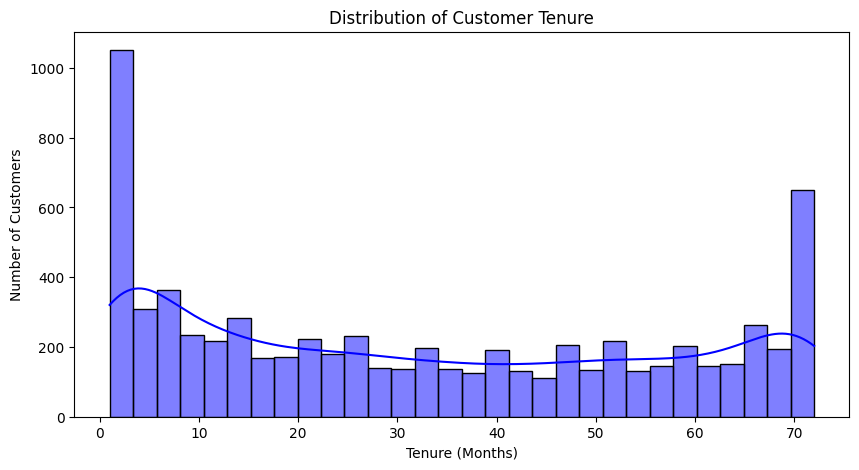

In [654]:
#Distribution of Customer Tenure
plt.figure(figsize=(10,5))
sns.histplot(telcodata["tenure(in_months)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()


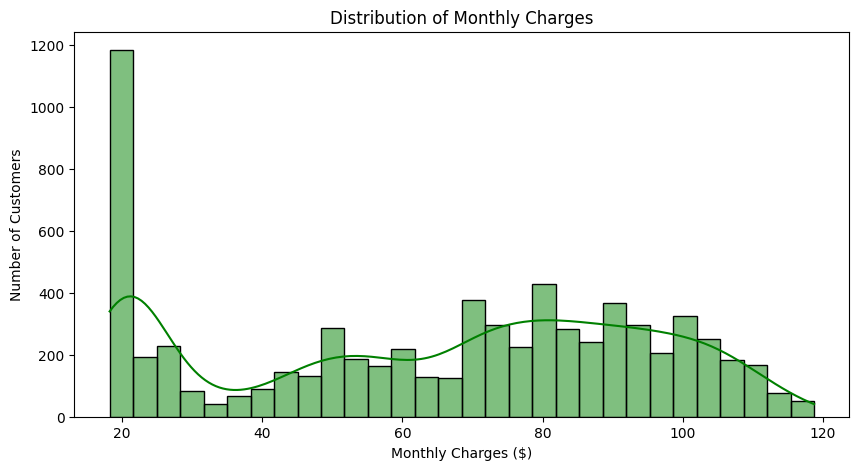

In [655]:
#Distribution of Monthly Charges
plt.figure(figsize=(10,5))
sns.histplot(telcodata["MonthlyCharges_($)"], bins=30, kde=True, color="green")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.show()


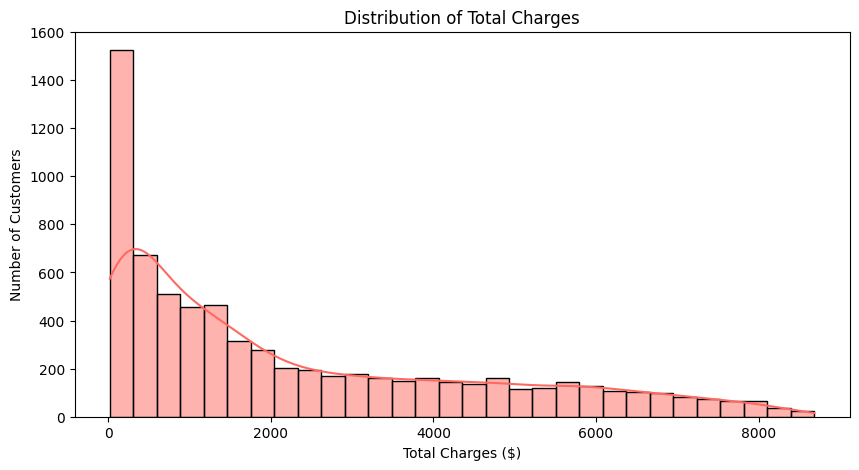

In [656]:
#Distribution of Total Charges
plt.figure(figsize=(10,5))
sns.histplot(telcodata["TotalCharges_($)"], bins=30, kde=True, color="#FF6961")
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Number of Customers")
plt.show()


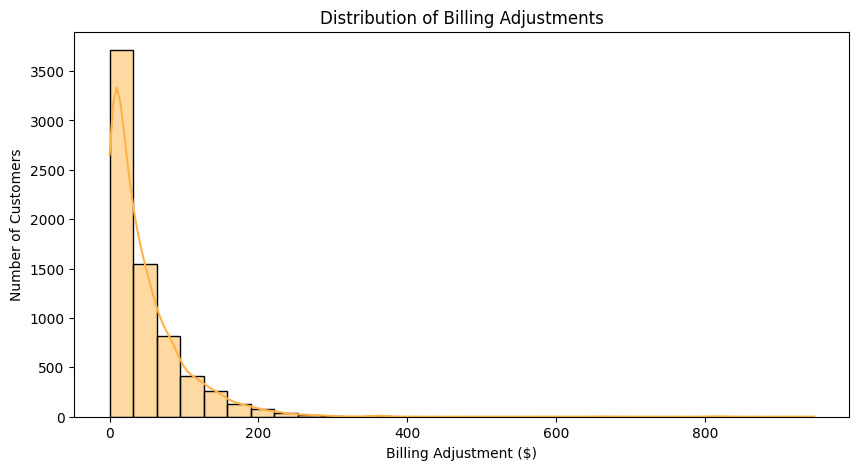

In [657]:
#Distribution of Adjustments 
plt.figure(figsize=(10,5))
sns.histplot(telcodata["Billing_Adjustment_($)"], bins=30, kde=True, color="#FFB347")
plt.title("Distribution of Billing Adjustments")
plt.xlabel("Billing Adjustment ($)")
plt.ylabel("Number of Customers")
plt.show()


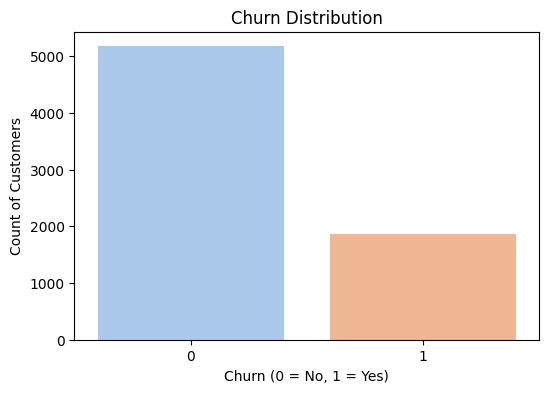

In [658]:
#Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=telcodata["Churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count of Customers")
plt.show()


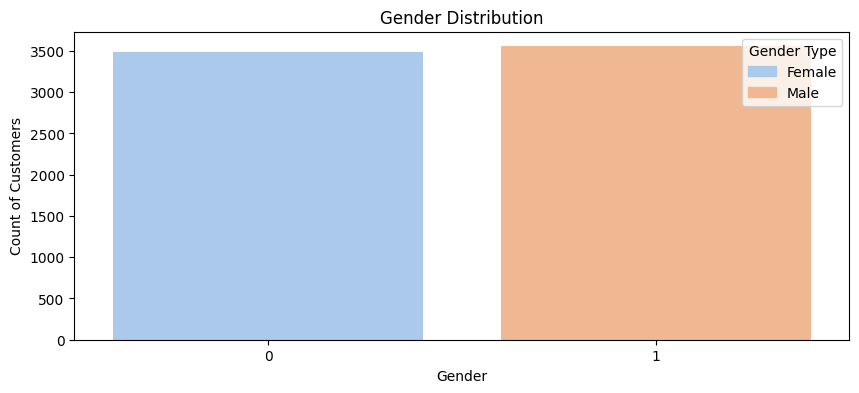

In [659]:
#plt.figure(figsize=(6,4))
#sns.countplot(x=telcodata["gender"], palette="Set2")
#plt.title("Gender Distribution")
#plt.xlabel("Gender")
#plt.ylabel("Count of Customers")
#plt.show()

#Gender Distribution
gender_labels = {0: "Female", 1: "Male" }

plt.figure(figsize=(10,4))
ax = sns.countplot(x=telcodata["gender"], palette="pastel")


handles = [plt.Rectangle((0,0),1,1, color=ax.patches[i].get_facecolor()) for i in range(2)]
plt.legend(handles,  gender_labels.values(), title="Gender Type", loc="upper right")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count of Customers")
plt.show()



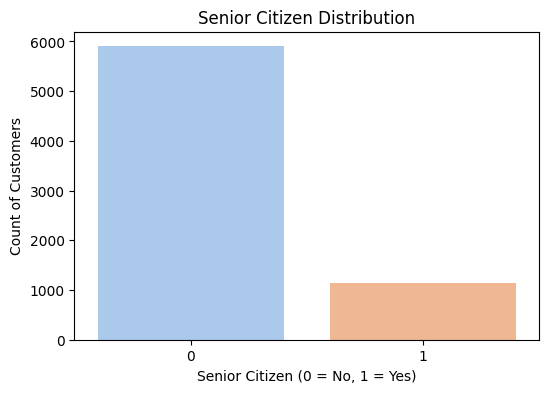

In [660]:
#Senior Citizen Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=telcodata["SeniorCitizen"], palette="pastel")
plt.title("Senior Citizen Distribution")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count of Customers")
plt.show()


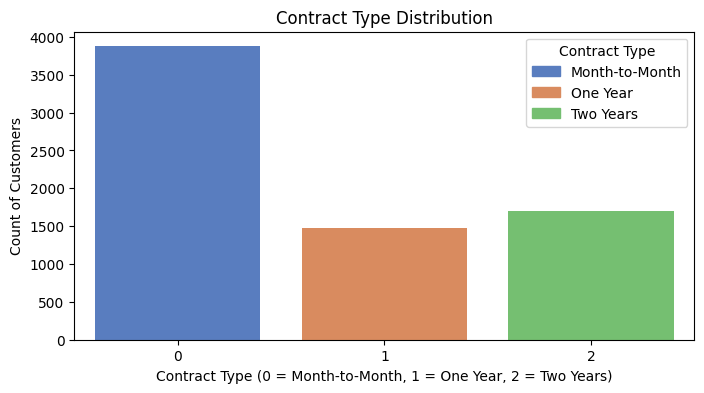

In [661]:
#plt.figure(figsize=(8,4))
#sns.countplot(x=telcodata["Contract"], palette="Paired")
#plt.title("Contract Type Distribution")
#plt.xlabel("Contract Type")
#plt.ylabel("Count of Customers")
#plt.show()

# Define contract type labels for the legend
contract_labels = {0: "Month-to-Month", 1: "One Year", 2: "Two Years"}

#Contract Type Distribution
plt.figure(figsize=(8,4))
ax = sns.countplot(x=telcodata["Contract"], palette="muted")

# Add legend manually
handles = [plt.Rectangle((0,0),1,1, color=ax.patches[i].get_facecolor()) for i in range(3)]
plt.legend(handles, contract_labels.values(), title="Contract Type", loc="upper right")

plt.title("Contract Type Distribution")
plt.xlabel("Contract Type (0 = Month-to-Month, 1 = One Year, 2 = Two Years)")
plt.ylabel("Count of Customers")
plt.show()



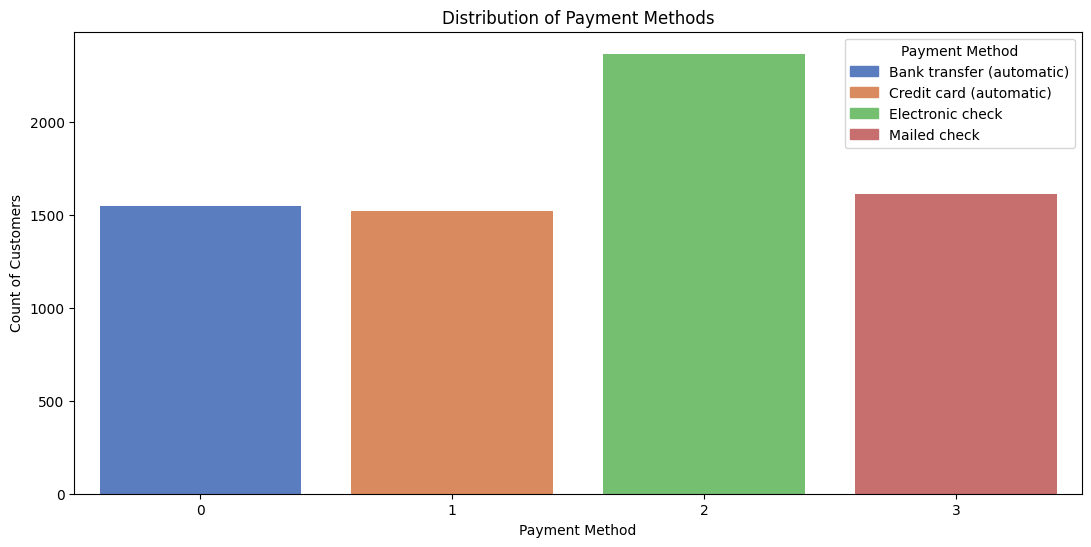

In [662]:


#plt.figure(figsize=(10,5))
#sns.countplot(x=telcodata["PaymentMethod"], palette="coolwarm")
#plt.xticks(rotation=45)
#plt.title("Distribution of Payment Methods")
#plt.xlabel("Payment Method")
#plt.ylabel("Count of Customers")
#plt.show()

# Define contract type labels for the legend
paymentmethod_labels = {0: "Bank transfer (automatic)", 1: "Credit card (automatic)", 2: "Electronic check", 3: "Mailed check"}

#Distribution of Payment Methods
plt.figure(figsize=(13,6))
ax = sns.countplot(x=telcodata["PaymentMethod"], palette="muted")

handles = [plt.Rectangle((0,0),1,1, color=ax.patches[i].get_facecolor()) for i in range(4)]
plt.legend(handles,  paymentmethod_labels.values(), title="Payment Method", loc="upper right")
plt.xticks(rotation=0)
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count of Customers")
plt.show()





#importance of "corr matrix" of numerical variables with the target variable "Churn" 

In [663]:
# Compute correlation matrix
corr_matrix = telcodata[["tenure(in_months)", "MonthlyCharges_($)", "TotalCharges_($)", "Billing_Adjustment_($)", "Churn"]].corr()

# Display correlation values
corr_matrix


,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($),Churn
tenure(in_months),1.000000,0.246801,0.825855,0.441170,-0.353813
MonthlyCharges_($),0.246801,1.000000,0.650864,0.307059,0.193356
TotalCharges_($),0.825855,0.650864,1.000000,0.482849,-0.199037
Billing_Adjustment_($),0.441170,0.307059,0.482849,1.000000,-0.135572
Churn,-0.353813,0.193356,-0.199037,-0.135572,1.000000


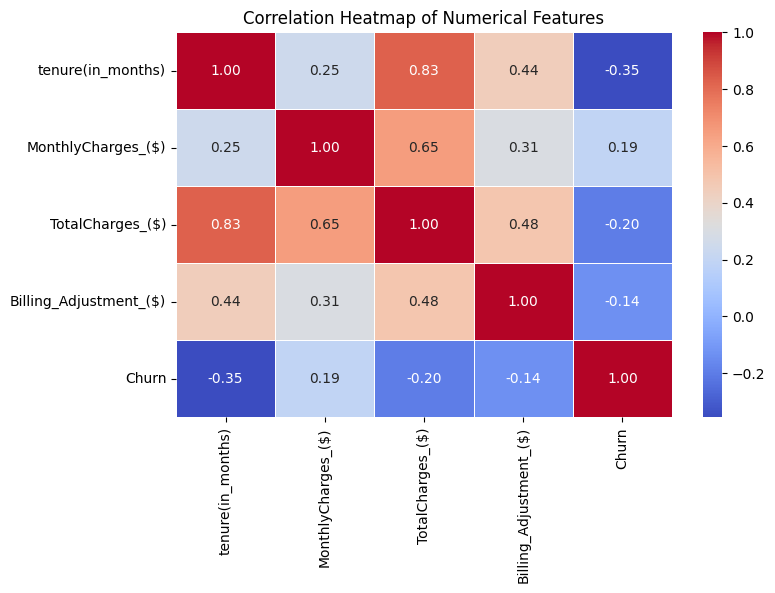

In [664]:
#Correlation Heatmap of Numerical Features
# Set figure size
plt.figure(figsize=(8,5))

# Create heatmap with correlation values
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#importance of corr matrix with categorical variable

In [665]:
factor_columns_matrix = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', "Churn"]

corr_matrix1 = telcodata[factor_columns_matrix].corr()

corr_matrix1



,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.008612
Partner,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,-0.150448
Dependents,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.164221
PhoneService,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.011942
MultipleLines,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.038037
InternetService,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.047291
OnlineSecurity,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.289309
OnlineBackup,-0.012057,0.153130,0.091015,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,-0.195525
DeviceProtection,0.000549,0.166330,0.080537,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,-0.178134
TechSupport,-0.006825,0.126733,0.133524,-0.019158,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,0.425367,-0.113600,-0.104670,-0.282492


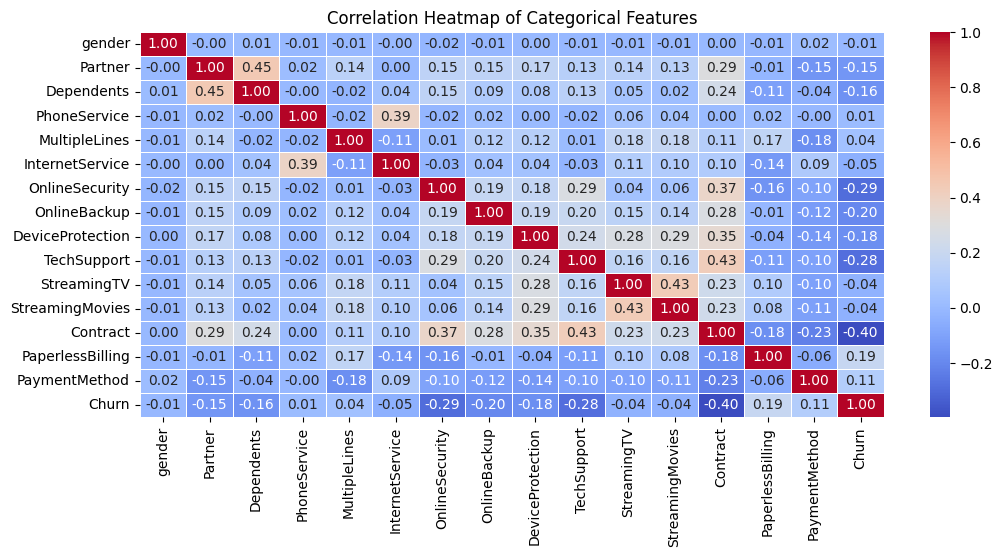

In [666]:
#Correlation Heatmap of Numerical Features
# Set figure size
plt.figure(figsize=(12,5))

# Create heatmap with correlation values
sns.heatmap(corr_matrix1, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title
plt.title("Correlation Heatmap of Categorical Features")
plt.show()

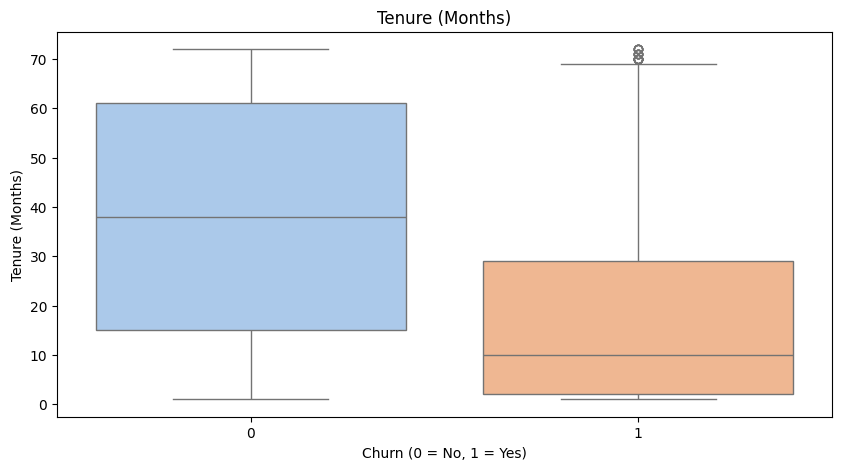

In [667]:
#Tenure vs. Churn
plt.figure(figsize=(10,5))
sns.boxplot(x="Churn", y="tenure(in_months)", data=telcodata, palette="pastel")
plt.title("Tenure (Months)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()


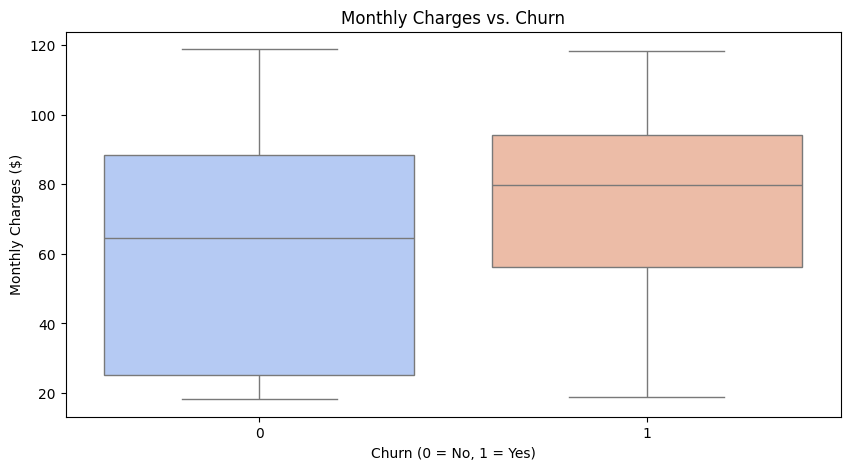

In [668]:
#Monthly Charges vs. Churn
plt.figure(figsize=(10,5))
sns.boxplot(x="Churn", y="MonthlyCharges_($)", data=telcodata, palette="coolwarm")
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges ($)")
plt.show()


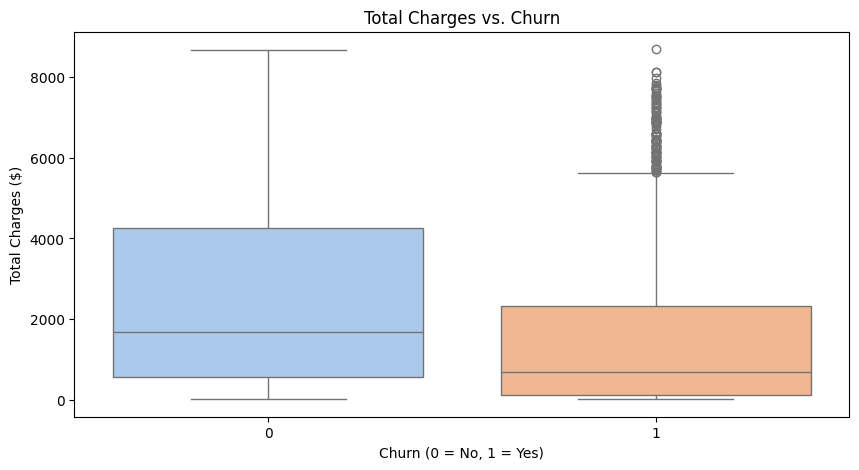

In [669]:
#Total Charges vs. Churn
plt.figure(figsize=(10,5))
sns.boxplot(x="Churn", y="TotalCharges_($)", data=telcodata, palette="pastel")
plt.title("Total Charges vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total Charges ($)")
plt.show()

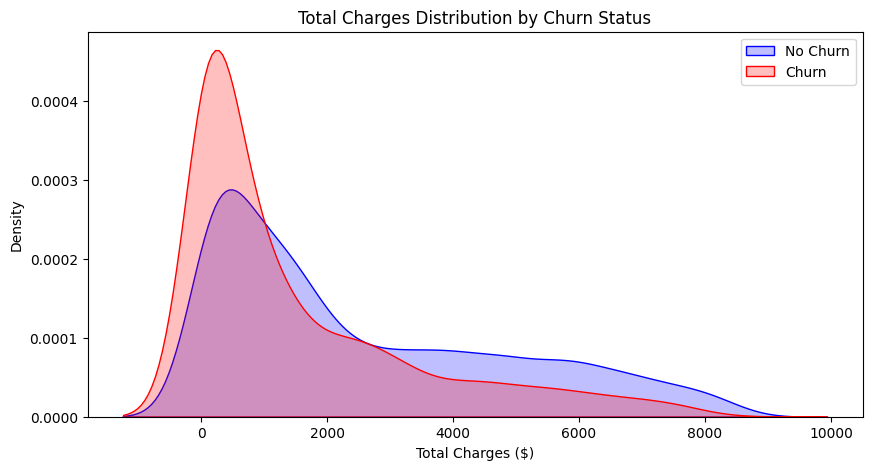

In [670]:
#Total Charges Distribution by Churn Status
plt.figure(figsize=(10,5))
sns.kdeplot(telcodata[telcodata["Churn"] == 0]["TotalCharges_($)"], label="No Churn", shade=True, color="blue")
sns.kdeplot(telcodata[telcodata["Churn"] == 1]["TotalCharges_($)"], label="Churn", shade=True, color="red")
plt.title("Total Charges Distribution by Churn Status")
plt.xlabel("Total Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.show()


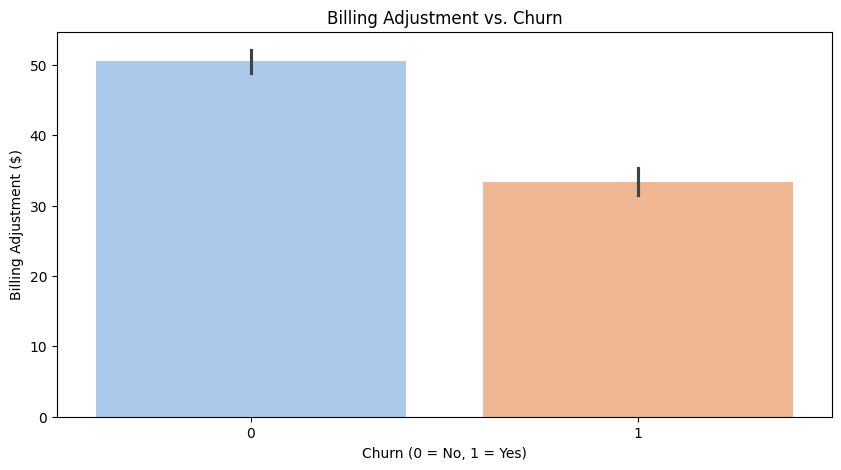

In [671]:
#Billing Adjustment vs. Churn
plt.figure(figsize=(10,5))
sns.barplot(x="Churn", y="Billing_Adjustment_($)", data=telcodata, palette="pastel")
plt.title("Billing Adjustment vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Billing Adjustment ($)")
plt.show()


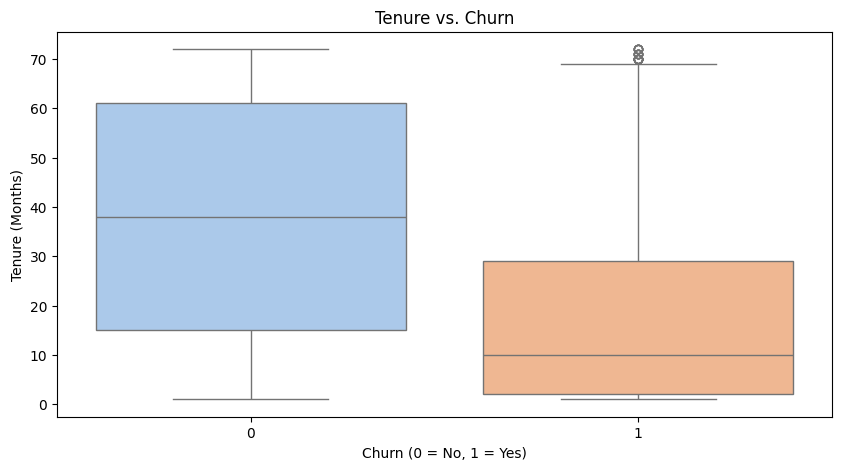

In [672]:
#Tenure vs. Churn
plt.figure(figsize=(10,5))
sns.boxplot(x="Churn", y="tenure(in_months)", data=telcodata, palette="pastel")
plt.title("Tenure vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()


#Analysing the "Churn" with "Billing_Adjustment_($)"

In [673]:
# Check average tenure for customers with high billing adjustments
telcodata.groupby("Churn")["Billing_Adjustment_($)"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,50.578551,58.904134,0.0,12.2625,33.525,70.15,947.175
1,1869.0,33.382129,44.722677,0.0,2.3500,16.650,44.90,355.350


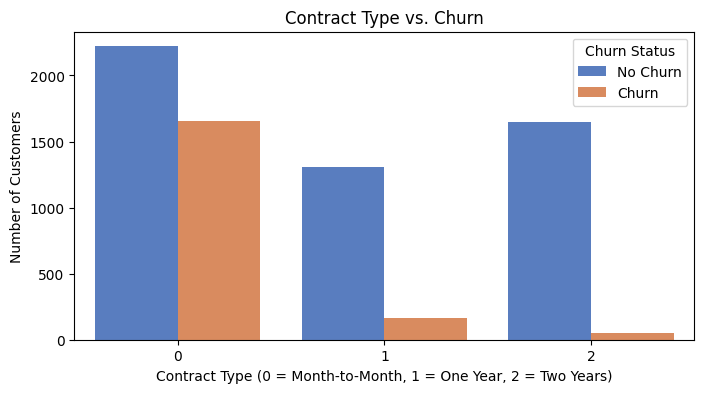

In [674]:
#Contract Type vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="Contract", hue="Churn", data=telcodata, palette="muted")

# Add legend for better clarity
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Contract Type vs. Churn")
plt.xlabel("Contract Type (0 = Month-to-Month, 1 = One Year, 2 = Two Years)")
plt.ylabel("Number of Customers")
plt.show()


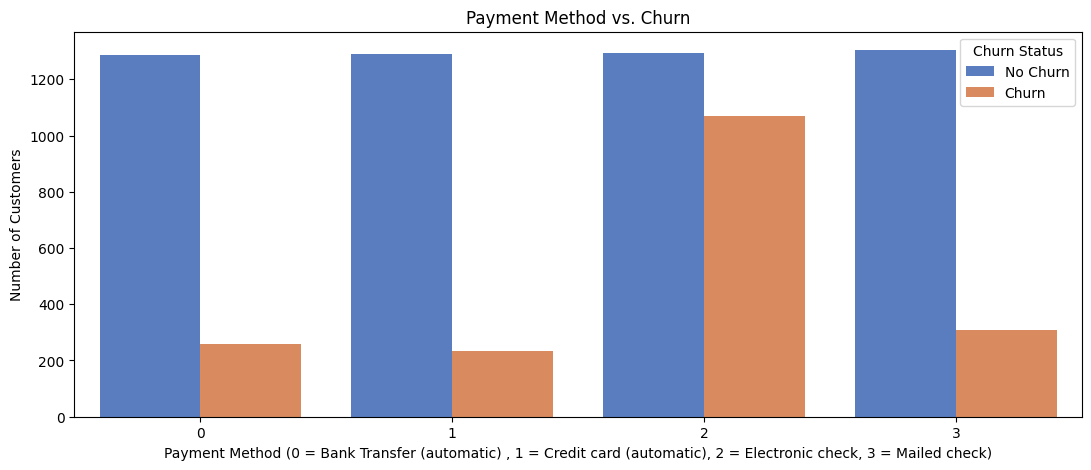

In [675]:
#Payment Method vs. Churn
plt.figure(figsize=(13,5))
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.xticks(rotation=0)
plt.title("Payment Method vs. Churn")
plt.xlabel("Payment Method (0 = Bank Transfer (automatic) , 1 = Credit card (automatic), 2 = Electronic check, 3 = Mailed check)")
plt.ylabel("Number of Customers")
plt.show()


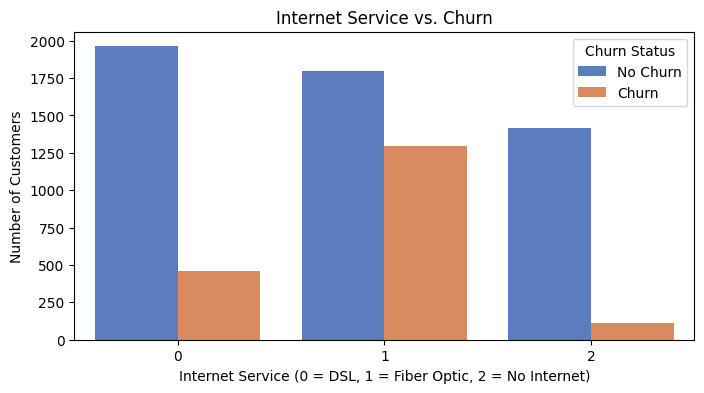

In [676]:
#Internet Service vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="InternetService", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Internet Service vs. Churn")
plt.xlabel("Internet Service (0 = DSL, 1 = Fiber Optic, 2 = No Internet)")
plt.ylabel("Number of Customers")
plt.show()


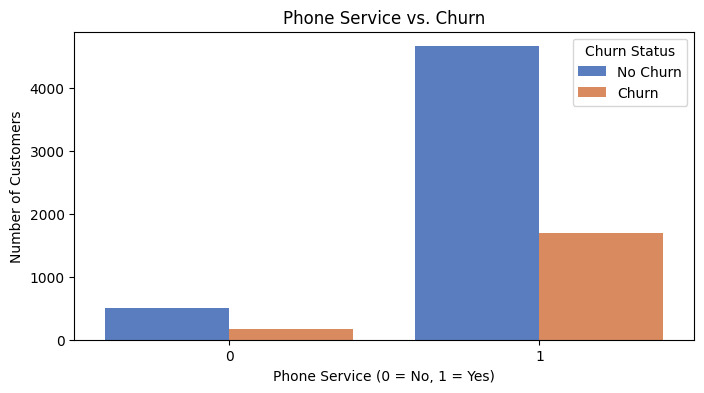

In [677]:
#Phone Service vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="PhoneService", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Phone Service vs. Churn")
plt.xlabel("Phone Service (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


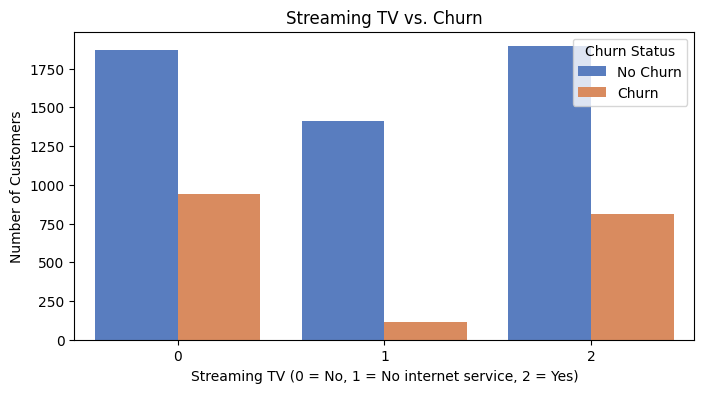

In [678]:
#Streaming TV vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="StreamingTV", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Streaming TV vs. Churn")
plt.xlabel("Streaming TV (0 = No, 1 = No internet service, 2 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


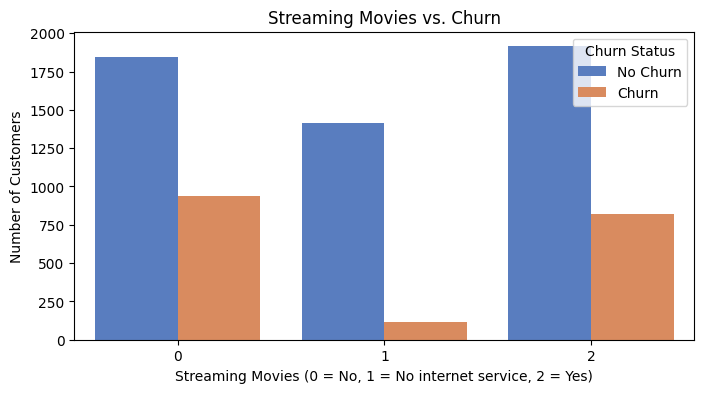

In [679]:
#Streaming Movies vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="StreamingMovies", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Streaming Movies vs. Churn")
plt.xlabel("Streaming Movies (0 = No, 1 = No internet service, 2 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


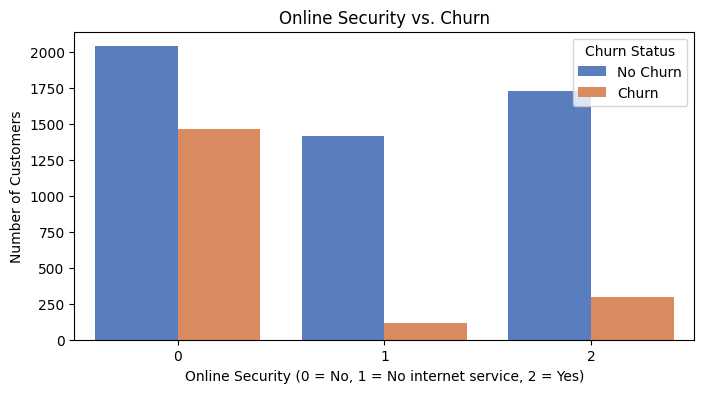

In [680]:
#Online Security vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Online Security vs. Churn")
plt.xlabel("Online Security (0 = No, 1 = No internet service, 2 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


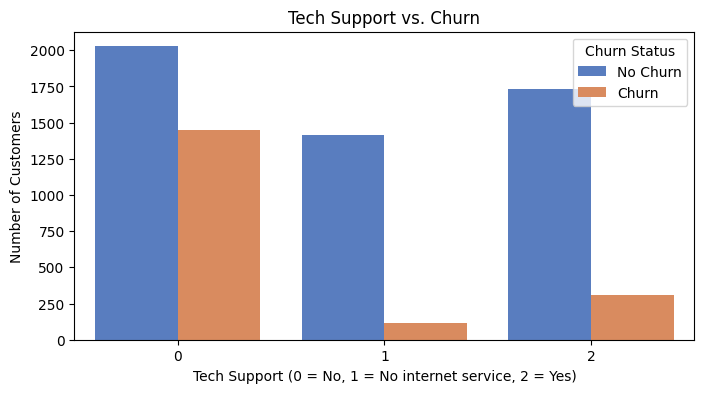

In [681]:
#Tech Support vs. Churn
plt.figure(figsize=(8,4))
ax = sns.countplot(x="TechSupport", hue="Churn", data=telcodata, palette="muted")

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Churn", "Churn"], title="Churn Status", loc="upper right")

plt.title("Tech Support vs. Churn")
plt.xlabel("Tech Support (0 = No, 1 = No internet service, 2 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


In [682]:
# Checking summary statistics for key numerical columns
telcodata[['tenure(in_months)', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)']].describe()


,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($)
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.416442,64.761692,2281.916928,46.015139
std,24.526454,30.090047,2265.270398,56.009226
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,9.450000
50%,29.000000,70.350000,1397.475000,28.700000
75%,55.000000,89.850000,3786.600000,63.975000
max,72.000000,118.750000,8684.800000,947.175000


#Analysing the "TotalCharges_($)" for interpreting the customer and tenure

In [683]:
# Check how many customers have TotalCharges = 0
zero_total_charges = telcodata[telcodata["TotalCharges_($)"] == 0]
print(f"Number of customers with $0 Total Charges: {len(zero_total_charges)}")


Number of customers with $0 Total Charges: 0


#Also checking the Billing_Adjustment_($) with churn for the customers

In [684]:
# Check the distribution of billing adjustments for churned vs non-churned customers
telcodata.groupby("Churn")["Billing_Adjustment_($)"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,50.578551,58.904134,0.0,12.2625,33.525,70.15,947.175
1,1869.0,33.382129,44.722677,0.0,2.3500,16.650,44.90,355.350


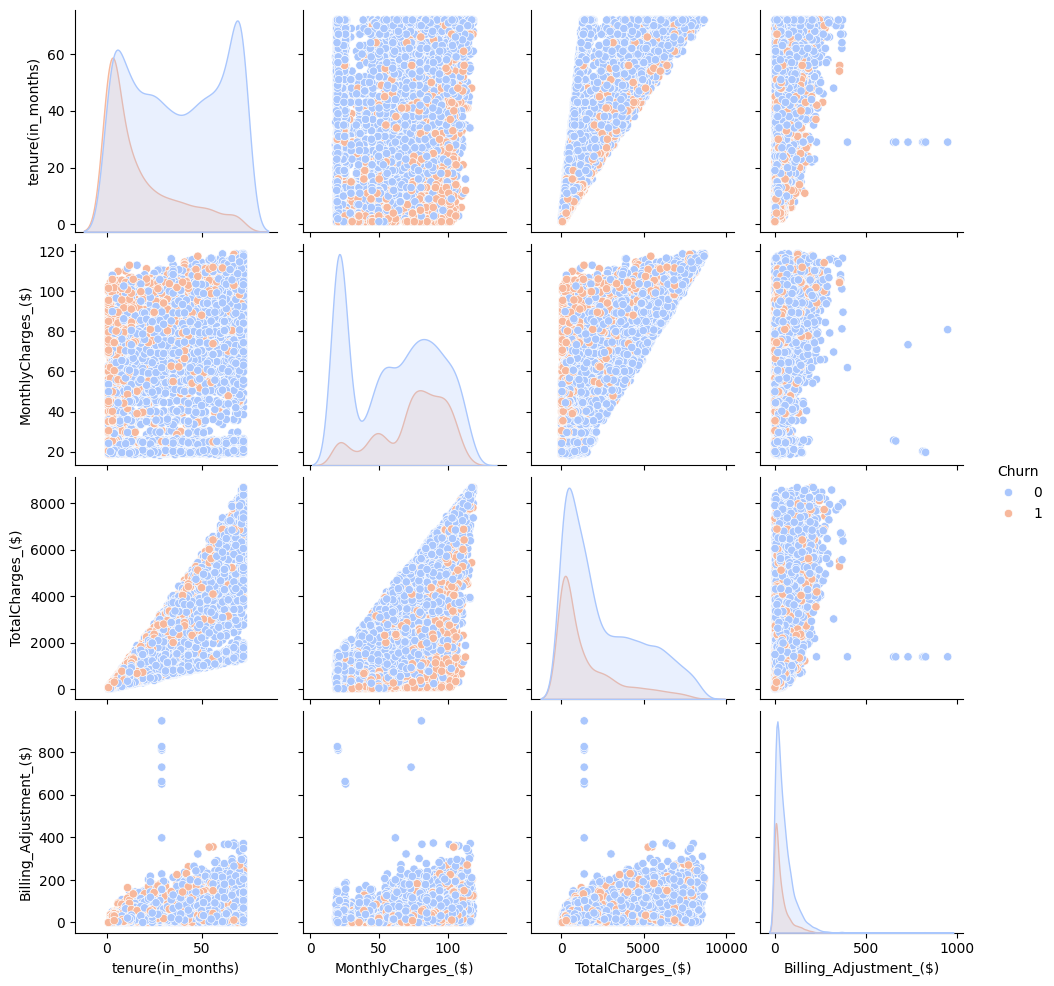

In [685]:
#Plots for numerical variables with churn
# Selecting important numeric variables
important_features = ["tenure(in_months)", "MonthlyCharges_($)", "TotalCharges_($)", "Billing_Adjustment_($)", "Churn"]

# Create pairplot
sns.pairplot(telcodata[important_features], hue="Churn", palette="coolwarm")
plt.show()


In [686]:
#VIF scores for interpreting the behaviour towards the target of numerical feature 
# Selecting only numerical features
X = telcodata[["tenure(in_months)", "MonthlyCharges_($)", "TotalCharges_($)", "Billing_Adjustment_($)"]]

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


                  Feature       VIF
0       tenure(in_months)  6.579296
1      MonthlyCharges_($)  3.490236
2        TotalCharges_($)  8.167334
3  Billing_Adjustment_($)  2.208847


#Double checking the results 

In [687]:
telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($)
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0.00
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,46.80
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0.45
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,62.75
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,10.25


In [688]:
telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  7043 non-null   int64  
 1   SeniorCitizen           7043 non-null   int64  
 2   Partner                 7043 non-null   int64  
 3   Dependents              7043 non-null   int64  
 4   tenure(in_months)       7043 non-null   int64  
 5   PhoneService            7043 non-null   int64  
 6   MultipleLines           7043 non-null   int64  
 7   InternetService         7043 non-null   int64  
 8   OnlineSecurity          7043 non-null   int64  
 9   OnlineBackup            7043 non-null   int64  
 10  DeviceProtection        7043 non-null   int64  
 11  TechSupport             7043 non-null   int64  
 12  StreamingTV             7043 non-null   int64  
 13  StreamingMovies         7043 non-null   int64  
 14  Contract                7043 non-null   

#Preparing the numerical variables for scalling  

In [689]:
# Step 1: Identify categorical (encoded) and numerical columns correctly
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']  # Add all encoded categorical variables here
numerical_cols = [col for col in telcodata.columns if col not in categorical_cols]  # Select only numerical ones


In [690]:
telcodata[['tenure(in_months)', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)']].describe()

,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($)
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.416442,64.761692,2281.916928,46.015139
std,24.526454,30.090047,2265.270398,56.009226
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,9.450000
50%,29.000000,70.350000,1397.475000,28.700000
75%,55.000000,89.850000,3786.600000,63.975000
max,72.000000,118.750000,8684.800000,947.175000


#Numerical variable before scalling

In [691]:
telcodata[['tenure(in_months)', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)']].head()

,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($)
0,1,29.85,29.85,0.00
1,34,56.95,1889.50,46.80
2,2,53.85,108.15,0.45
3,45,42.30,1840.75,62.75
4,2,70.70,151.65,10.25


In [692]:
#fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(11, len(numerical_cols) * 3))

#for i, col in enumerate(numerical_cols):
    # Original (Unscaled)
    #sns.histplot(telcodata[col], bins=30, kde=True, ax=axes[i, 0])
    #axes[i, 0].set_title(f"Before Scaling: {col}")

#Applying "StanderScaler" for scalling on the numerical variable 

In [693]:
# Step 2: Apply StandardScaler only on numerical columns
scaler = StandardScaler()
telcodata[numerical_cols] = scaler.fit_transform(telcodata[numerical_cols])

#After Scalling

In [694]:
# Step 3: Verify if categorical values are still 0 and 1
telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($)
0,0,0,1,0,-1.281012,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.994242,0,-0.821622
1,1,0,0,0,0.064570,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.173244,0,0.014014
2,1,0,0,0,-1.240236,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.959674,1,-0.813587
3,1,0,0,0,0.513097,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.194766,0,0.298809
4,0,0,0,0,-1.240236,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.940470,1,-0.638603


In [695]:
telcodata[['tenure(in_months)', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)']].describe()

,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($)
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-9.029331e-17,-6.406285e-17,-1.488074e-17,5.649637e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.281012e+00,-1.545860e+00,-9.991203e-01,-8.216219e-01
25%,-9.548100e-01,-9.725399e-01,-8.298459e-01,-6.528877e-01
50%,-1.393061e-01,1.857327e-01,-3.904632e-01,-3.091699e-01
75%,9.208490e-01,8.338335e-01,6.642871e-01,3.206817e-01
max,1.614027e+00,1.794352e+00,2.826743e+00,1.609063e+01


In [696]:
telcodata[['tenure(in_months)', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)']].head()

,tenure(in_months),MonthlyCharges_($),TotalCharges_($),Billing_Adjustment_($)
0,-1.281012,-1.160323,-0.994242,-0.821622
1,0.064570,-0.259629,-0.173244,0.014014
2,-1.240236,-0.362660,-0.959674,-0.813587
3,0.513097,-0.746535,-0.194766,0.298809
4,-1.240236,0.197365,-0.940470,-0.638603


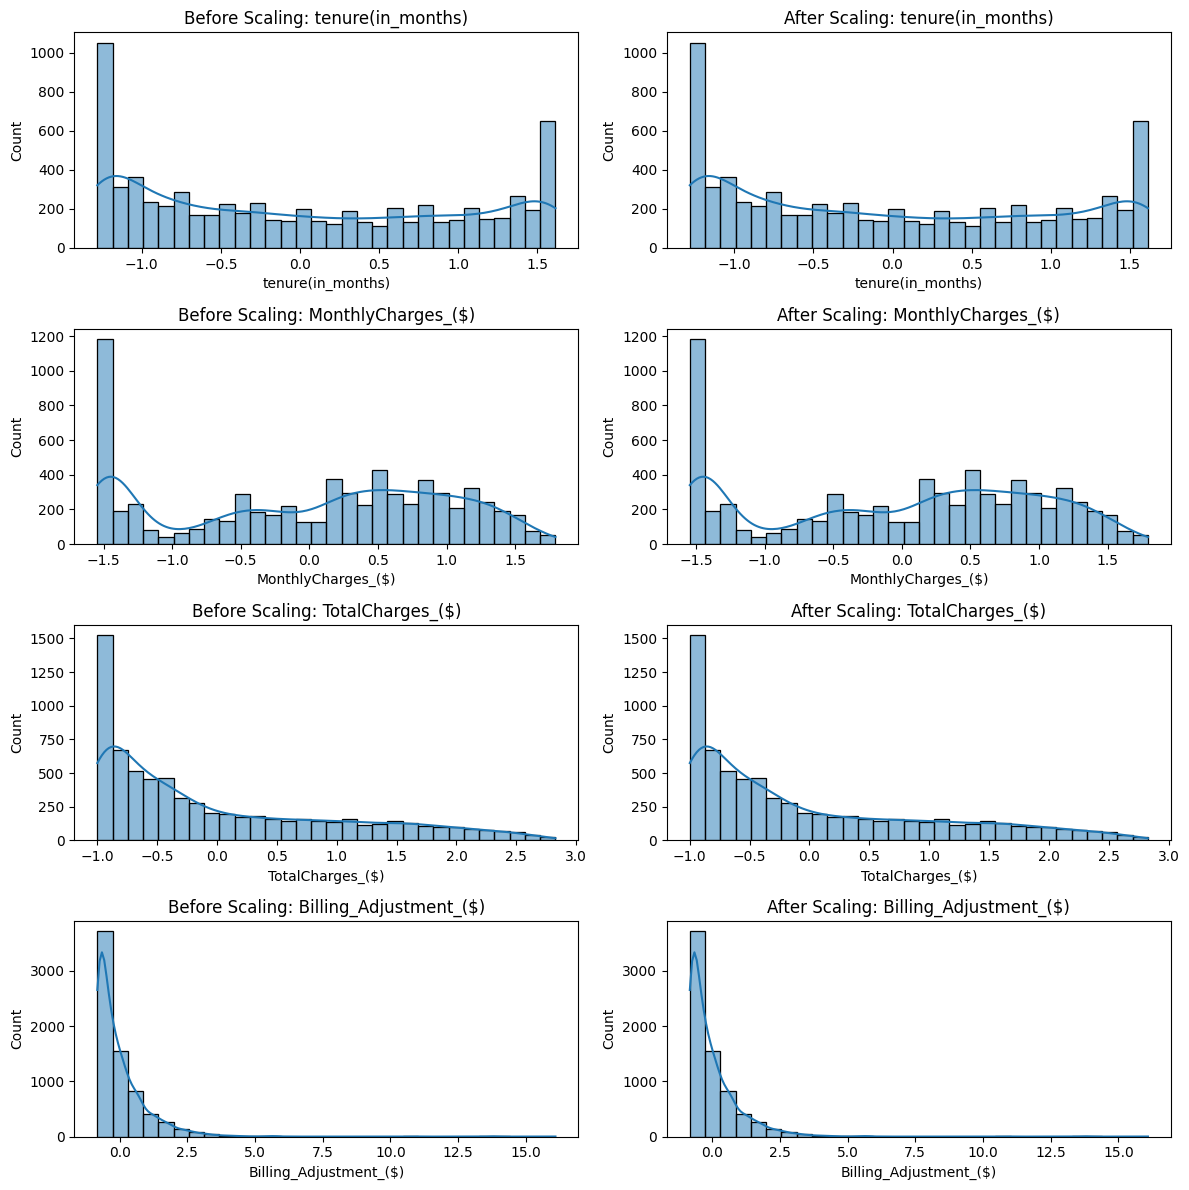

In [697]:
#Plot Distributions (Before vs After Scaling)
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols):
    # Original (Unscaled)
    sns.histplot(telcodata[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Scaling: {col}")
    
    # Scaled
    sns.histplot(telcodata[col], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"After Scaling: {col}")

plt.tight_layout()
plt.show()


#Data preparation have come to end.
#Now telcodata is ready to implementing the models on that. 

#Once again checking the proportion of churn[Target Variable] 

In [698]:
print(telcodata['Churn'].value_counts(normalize=True))  # Check class distribution


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


#It can be seen that churn proportion are imbalance\
#Fixing that would be better while the splitting the "telcodata" into "train data" and "test data".\
#Using "SMOTE" function for balancing thd telcodata within the test and train data itself.

In [699]:
# Define features (X) and target (y)
X = telcodata.drop(columns=["Churn"])  # Drop the target column and less important or corelated variables
y = telcodata["Churn"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Apply SMOT only on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train) 

# Print dataset shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

print(telcodata.shape)



Training Data Shape: (8278, 20) (8278,)
Testing Data Shape: (1409, 20) (1409,)
(7043, 21)


#Here data shape for y train and test variable is not mentioning that sometimes it is alining with 2 dimentionality\
That cant be affected any model.

#Here is the balanced dataset after the "SMOTE" function used\
#Effect can be seen in the output of this cell.

In [700]:
# Check class distribution in training set
print("Balanced y_train Class Distribution:\n", y_train.value_counts())

# Check the percentage of each class
print("\nBalanced y_train Class Distribution (Percentage):\n", y_train.value_counts(normalize=True) * 100)


Balanced y_train Class Distribution:
 Churn
0    4139
1    4139
Name: count, dtype: int64

Balanced y_train Class Distribution (Percentage):
 Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


#Creating the additional feature named "Charge_Per_Month"\ to see if it can add more accuracy.

In [701]:
# Creating Charge Per Month Feature
X_train["Charge_Per_Month"] = X_train["TotalCharges_($)"] / (X_train["tenure(in_months)"] + 1)
X_test["Charge_Per_Month"] = X_test["TotalCharges_($)"] / (X_test["tenure(in_months)"] + 1)


In [702]:
telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($)
0,0,0,1,0,-1.281012,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.994242,0,-0.821622
1,1,0,0,0,0.064570,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.173244,0,0.014014
2,1,0,0,0,-1.240236,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.959674,1,-0.813587
3,1,0,0,0,0.513097,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.194766,0,0.298809
4,0,0,0,0,-1.240236,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.940470,1,-0.638603


#Checking the importance of features from "sklearn.feature_selection" and import "mutual_info_classif"\
#Performing on the both training and testig dataset.

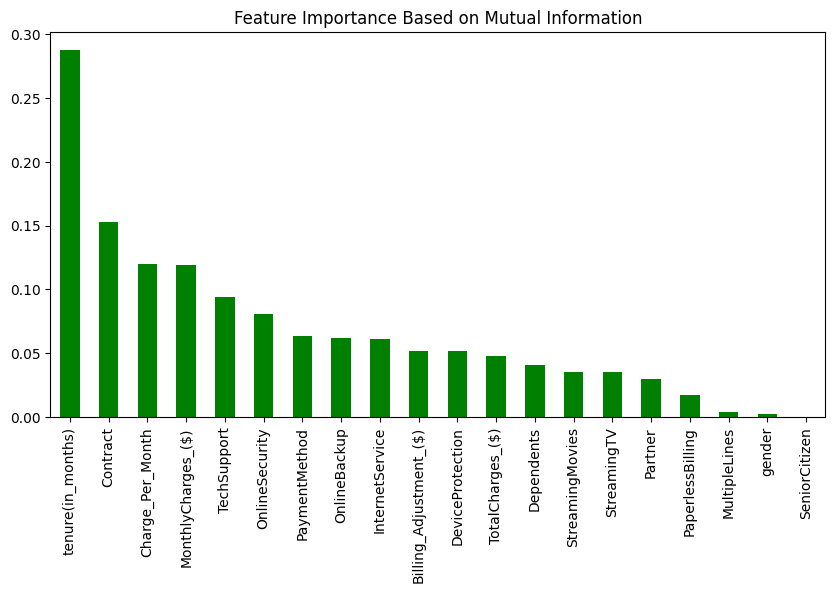

In [703]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(X_train, y_train, discrete_features="auto")

# Convert to DataFrame for better visualization
feature_importance = pd.Series(mi_scores, index=X_train.columns)

# Plot top 10 important features
plt.figure(figsize=(10, 5))
feature_importance.sort_values(ascending=False).head(20).plot(kind="bar", color="green")
plt.title("Feature Importance Based on Mutual Information")
plt.show()


#Double Checking the resuts for if output goes right and can proceed to the modeling.

In [704]:
# Check the shape of the train and test sets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# Check if 'Churn' is removed from X
print("\nColumns in X_train (Features):", X_train.columns.tolist())

# Check if y contains only 0s and 1s
print("\nUnique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

# Check if stratification worked (churn proportion in train & test)
print("\nChurn distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nChurn distribution in testing set:\n", y_test.value_counts(normalize=True))


X_train Shape: (8278, 21)
X_test Shape: (1409, 21)
y_train Shape: (8278,)
y_test Shape: (1409,)

Columns in X_train (Features): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure(in_months)', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges_($)', 'TotalCharges_($)', 'Billing_Adjustment_($)', 'Charge_Per_Month']

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]

Churn distribution in training set:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Churn distribution in testing set:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


#Defining the threshold so it can be easier to maintain the no of features that can be included into the model\
#To ease of this process this can be a useful\
#Here it can be seen that already defined the threshhold values and to be consdered the features more than that threshold values.\
#Selected feature can be seen in the output.

In [705]:
# Define a threshold for feature importance (adjust if needed)
threshold = 0.05  # Features below this MI score will be dropped

# Select only important features
selected_features = feature_importance[feature_importance > threshold].index.tolist()

# Update X_train and X_test with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print updated shape
print("Updated X_train shape:", X_train_selected.shape)
print("Updated X_test shape:", X_test_selected.shape)
print("Selected Features:", selected_features)


Updated X_train shape: (8278, 11)
Updated X_test shape: (1409, 11)
Selected Features: ['tenure(in_months)', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges_($)', 'Billing_Adjustment_($)', 'Charge_Per_Month']


## Part 3

Please Note: some only slightly fluctuations in output can occur because of the nature of algorithms\
Rare Chances(Can be happne in only in predictive part)

Only Decision Tree, Random Forest, XG-Boost (Included in report) which satisfied the conditions of assesment \
This 3 model have selected for report because, overall Best and suitable model for churn and have compared within 3 models as well  

#Starting the "prediction" modeling part\
#Implemented many models based on the target variables and the fetures\
#Compare all the implemented models and the choose the best fit models. 

Confusion Matrix (Logistic Regression):
 [[735 300]
 [ 84 290]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409


Accuracy (Logistic Regression): 0.7274662881476224


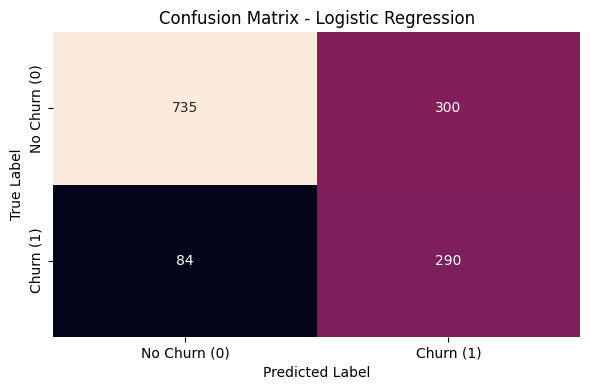

In [706]:
#Build and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_selected, y_train)

#Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_selected)

#Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("\nClassification Report (Logistic Regression):\n", class_report_log_reg)
print("\nAccuracy (Logistic Regression):", accuracy_log_reg)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

In [707]:
# Perform 5-fold cross-validation on Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression - 5-fold CV Accuracy: {np.mean(cv_scores_log_reg)}")

Logistic Regression - 5-fold CV Accuracy: 0.7703539997372915


Decision Tree Model (Included)

Confusion Matrix (DecisionTree):
 [[792 243]
 [156 218]]

Classification Report (DecisionTree):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1035
           1       0.47      0.58      0.52       374

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409


Accuracy (DecisionTree): 0.716820440028389


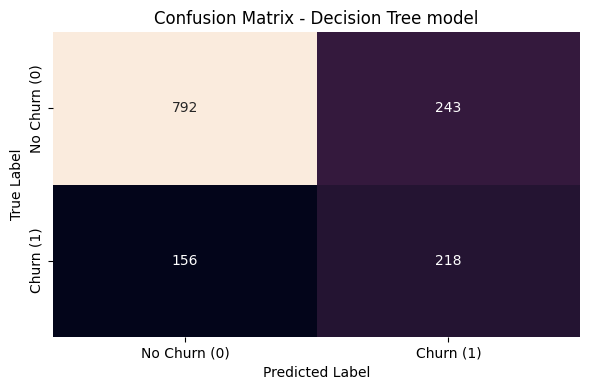

In [708]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_selected)

# Evaluation
conf_matrix_knn = confusion_matrix(y_test, y_pred_dt)
class_report_knn = classification_report(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_dt)

print("Confusion Matrix (DecisionTree):\n", conf_matrix_knn)
print("\nClassification Report (DecisionTree):\n", class_report_knn)
print("\nAccuracy (DecisionTree):", accuracy_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree model")
plt.tight_layout()
plt.show()


In [709]:
# List of max_depth values to test
for depth in [3, 5, 7]:
    # Initialize Decision Tree with current max_depth
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train_selected, y_train)  # Train model

    # Predictions
    y_pred_dt = dt_clf.predict(X_test_selected)

    # Print results
    print(f"Decision Tree (max_depth={depth}) - Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_dt))
    print("-" * 50)  # Separator for better readability



Decision Tree (max_depth=3) - Accuracy: 0.7374
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.76      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409

--------------------------------------------------
Decision Tree (max_depth=5) - Accuracy: 0.7097
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      1035
           1       0.47      0.82      0.60       374

    accuracy                           0.71      1409
   macro avg       0.69      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409

--------------------------------------------------
Decision Tree (max_depth=7) - Accuracy: 0.7402
Classification Report:
               precision    reca

In [710]:
# Perform 5-fold cross-validation on decision tree Classifier
cv_scores_dt = cross_val_score(dt_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Classifier - 5-fold CV Accuracy: {np.mean(cv_scores_dt)}")

Decision Tree Classifier - 5-fold CV Accuracy: 0.7573138053329831


Random Forest Model (Included)

Confusion Matrix (Random Forest):
 [[832 203]
 [128 246]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.66      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409


Accuracy (Random Forest): 0.7650816181689141


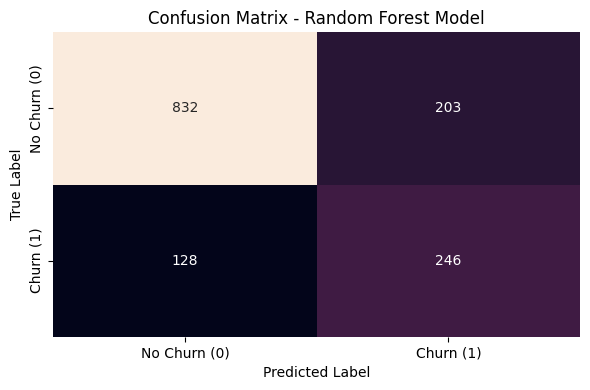

In [711]:
#buid and train the random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

#Make prediction
y_pred_rf = rf_model.predict(X_test_selected)

#Evaluate the model

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)
print("\nClassification Report (Random Forest):\n", class_report_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy from Grid Search: 0.8248397477998161

Confusion Matrix (Optimized Random Forest):
 [[824 211]
 [127 247]]

Classification Report (Optimized Random Forest):
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.54      0.66      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409


Optimized Model Accuracy: 0.7601135557132718


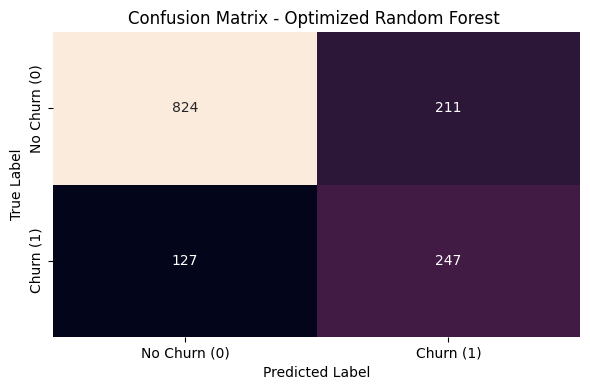

In [712]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy from Grid Search:", best_score)

# Train the final model using the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test_selected)

# Evaluate the optimized model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print("\nConfusion Matrix (Optimized Random Forest):\n", conf_matrix_best_rf)
print("\nClassification Report (Optimized Random Forest):\n", class_report_best_rf)
print("\nOptimized Model Accuracy:", accuracy_best_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Random Forest ")
plt.tight_layout()
plt.show()


In [713]:
# Perform 5-fold cross-validation on Random Forest Classifier
cv_scores_rf = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Classifier - 5-fold CV Accuracy: {np.mean(cv_scores_rf)}")

Random Forest Classifier - 5-fold CV Accuracy: 0.8235105886130449


Confusion Matrix (KNN):
 [[761 274]
 [113 261]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.49      0.70      0.57       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409


Accuracy (KNN): 0.7253371185237757


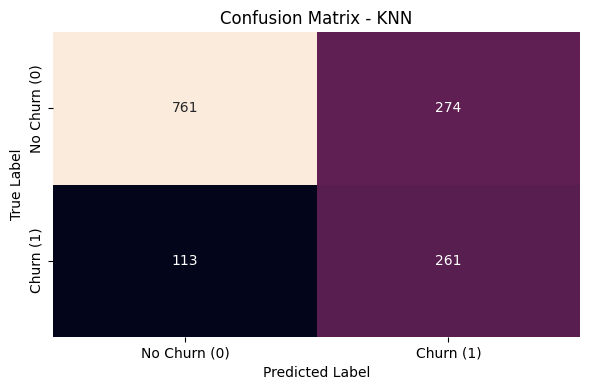

In [714]:
#Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)

#Make prediction
y_pred_knn = knn_model.predict(X_test_selected)

#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix (KNN):\n", conf_matrix_knn)
print("\nClassification Report (KNN):\n", class_report_knn)
print("\nAccuracy (KNN):", accuracy_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

In [715]:
# Hyperparameter Tuning: Testing different 'n_neighbors' for KNN
for n in [3, 5, 7]:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train_selected, y_train)
    y_pred_knn_clf = knn_clf.predict(X_test_selected)
    print(f"KNN (n_neighbors={n}) - Accuracy: {accuracy_score(y_test, y_pred_knn_clf)}")
    print("Classification Report:\n", classification_report(y_test, y_pred_knn_clf))


KNN (n_neighbors=3) - Accuracy: 0.7175301632363378
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79      1035
           1       0.48      0.66      0.55       374

    accuracy                           0.72      1409
   macro avg       0.67      0.70      0.67      1409
weighted avg       0.76      0.72      0.73      1409

KNN (n_neighbors=5) - Accuracy: 0.7253371185237757
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.49      0.70      0.57       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409

KNN (n_neighbors=7) - Accuracy: 0.7182398864442867
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      1035
           1

In [716]:
# Perform 5-fold cross-validation on KNN Classifier
cv_scores_knn = cross_val_score(knn_model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"KNN Classifier - 5-fold CV Accuracy: {np.mean(cv_scores_knn)}")

KNN Classifier - 5-fold CV Accuracy: 0.7873879475166747


XG-Boost Classifier Model (Included)

XGBoost Accuracy: 0.7615330021291696

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409


Confusion Matrix:
 [[804 231]
 [105 269]]


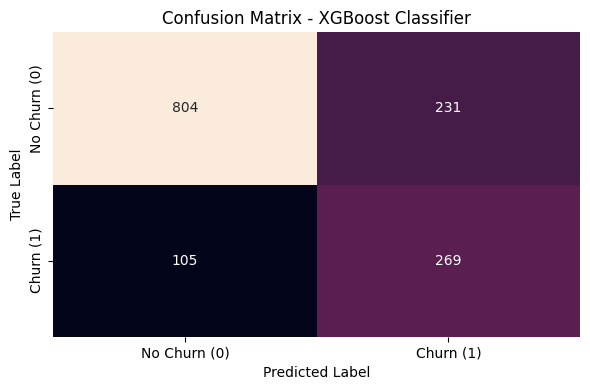

In [717]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



# Compute the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="rocket", cbar=False,
            xticklabels=["No Churn (0)", "Churn (1)"],
            yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()



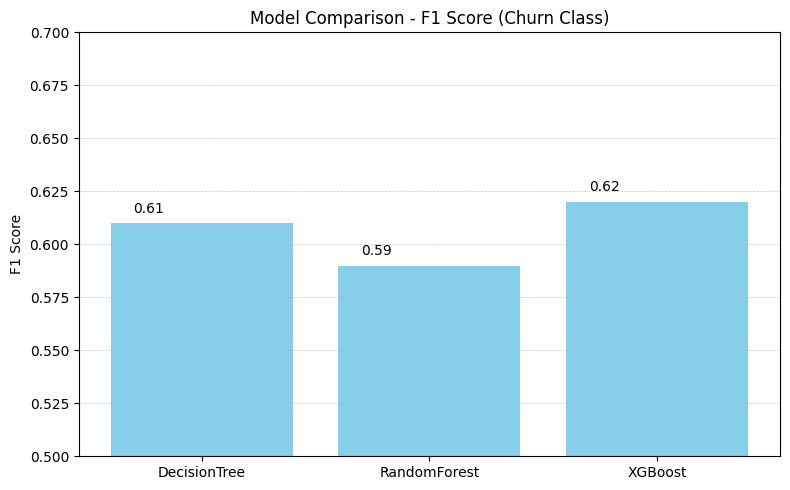

In [718]:
import matplotlib.pyplot as plt

models = ['DecisionTree', 'RandomForest', 'XGBoost']
f1_scores = [0.61, 0.59, 0.62]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, f1_scores, color='skyblue')
plt.ylim(0.5, 0.7)
plt.title("Model Comparison - F1 Score (Churn Class)")
plt.ylabel("F1 Score")
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + 0.005, f"{yval:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


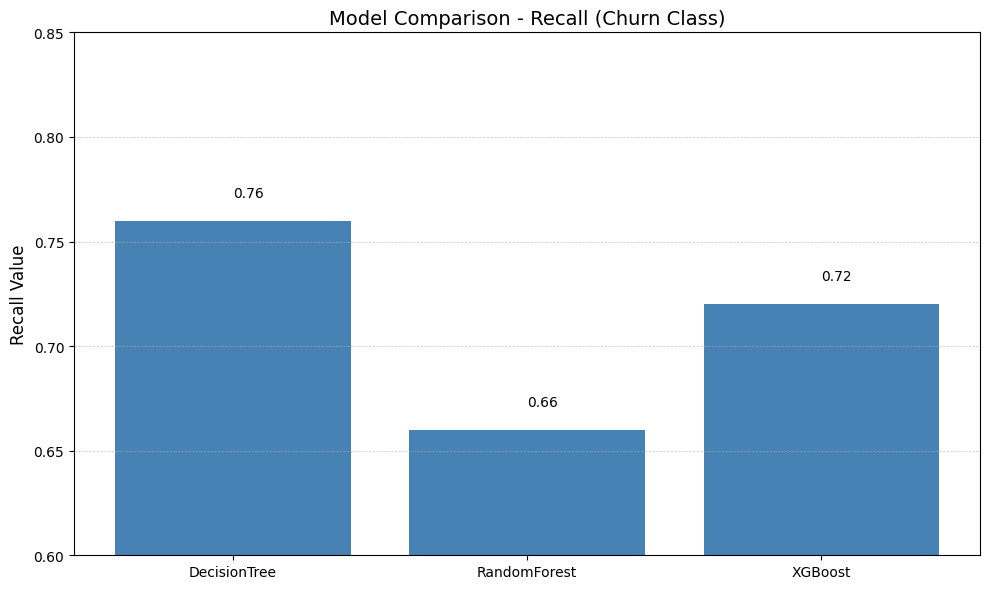

In [719]:
import matplotlib.pyplot as plt

models = ['DecisionTree', 'RandomForest', 'XGBoost']
recall = [0.76, 0.66, 0.72]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall, color='steelblue')

plt.ylim(0.6, 0.85)  # Adjusted for better visibility
plt.title("Model Comparison - Recall (Churn Class)", fontsize=14)
plt.ylabel("Recall Value", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


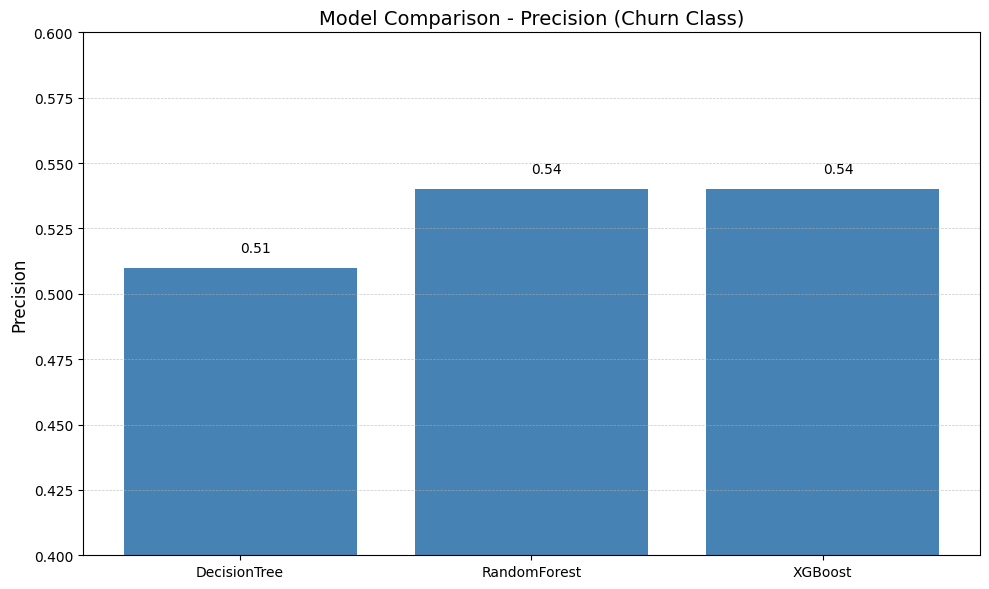

In [720]:
import matplotlib.pyplot as plt

models = ['DecisionTree', 'RandomForest', 'XGBoost']
precision = [0.51, 0.54, 0.54]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, precision, color='steelblue')

plt.ylim(0.4, 0.6)  # Adjusted to match the precision values
plt.title("Model Comparison - Precision (Churn Class)", fontsize=14)
plt.ylabel("Precision", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


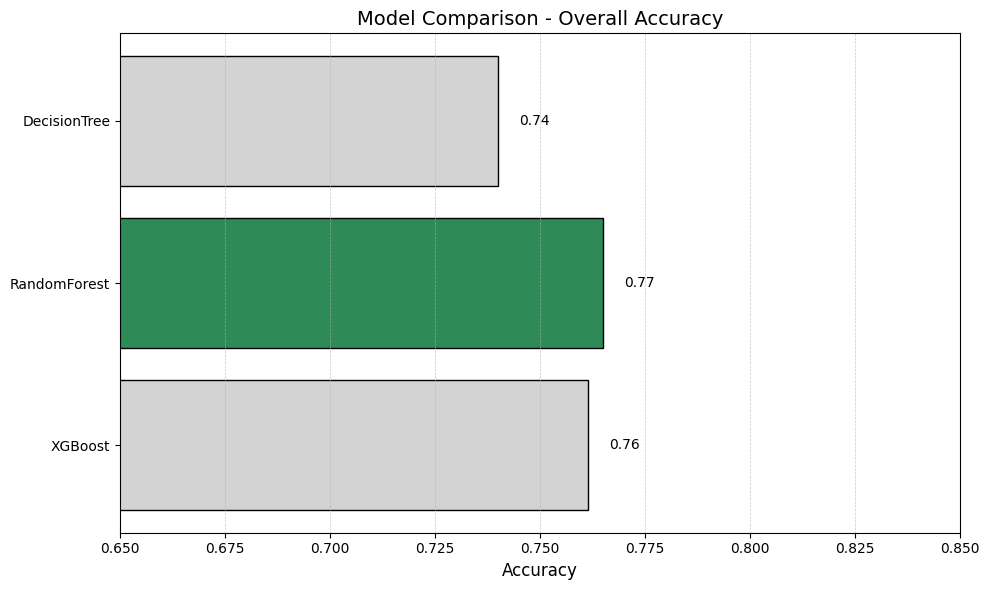

In [721]:
import matplotlib.pyplot as plt

models = ['DecisionTree', 'RandomForest', 'XGBoost']
accuracy = [0.74, 0.7650, 0.7615]

colors = ['lightgray'] * len(models)
best_model_index = accuracy.index(max(accuracy))
colors[best_model_index] = 'seagreen'

plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracy, color=colors, edgecolor='black')

plt.xlabel("Accuracy", fontsize=12)
plt.title("Model Comparison - Overall Accuracy", fontsize=14)
plt.xlim(0.65, 0.85)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.gca().invert_yaxis()  # Best model on top
plt.show()



## Part 4

#Starting the clustering models\
#Select the features and fit to the models with only train data\
#Evaluate the model based on the certan criteria and choose best model

#Now have tested all the different models, numerical values should be in the original formate\
#However, for clustering we can transform the variables according the selected features

In [722]:
telcodata[numerical_cols] = scaler.inverse_transform(telcodata[numerical_cols])

In [723]:
telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($)
0,0,0,1,0,1.0,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0.00
1,1,0,0,0,34.0,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,46.80
2,1,0,0,0,2.0,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0.45
3,1,0,0,0,45.0,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,62.75
4,0,0,0,0,2.0,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,10.25


#Cluster Model (included in report)
#Categorical Variable

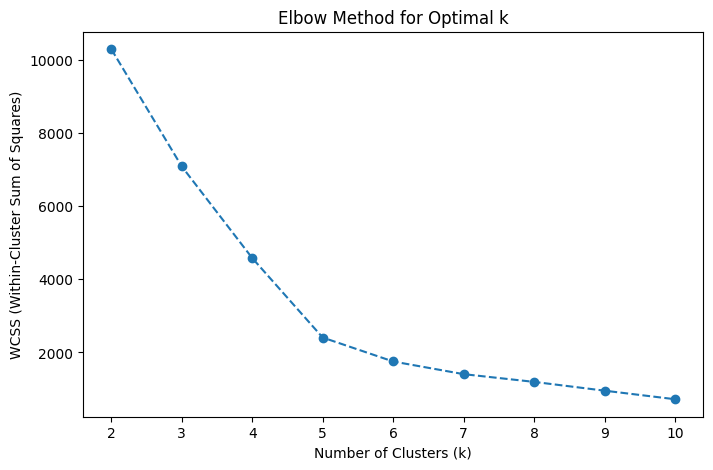

In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define selected features for clustering
clustering_features2 = ["TechSupport", "OnlineSecurity", "InternetService", "Churn"]

# Select only these features from the dataset
X_cluster = telcodata[clustering_features2]

# Elbow Method to Find Optimal Clusters
wcss = []
for k in range(2, 11):  # Trying cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [725]:
#  optimal k from the Elbow method is 3
k = 5

# Perform K-Means clustering with the optimal k
kmeans = KMeans(n_clusters= k, random_state=42, n_init=10)

# Fit the model to your data
kmeans.fit(X_cluster)

# Add the cluster labels to your dataframe
telcodata['Cluster'] = kmeans.labels_

# View the first few rows with the cluster labels
print(telcodata[['TechSupport', 'OnlineSecurity', 'InternetService', 'Churn', 'Cluster']].head())

# Calculate the silhouette score to evaluate clustering quality
sil_score = silhouette_score(X_cluster, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Print Inertia (WCSS)
print(f"Inertia (WCSS): {kmeans.inertia_:.4f}")




   TechSupport  OnlineSecurity  InternetService  Churn  Cluster
0            0               0                0      0        1
1            0               2                0      0        4
2            0               2                0      1        4
3            2               2                0      0        3
4            0               0                1      1        1
Silhouette Score: 0.6957452409626171
Inertia (WCSS): 2408.1439


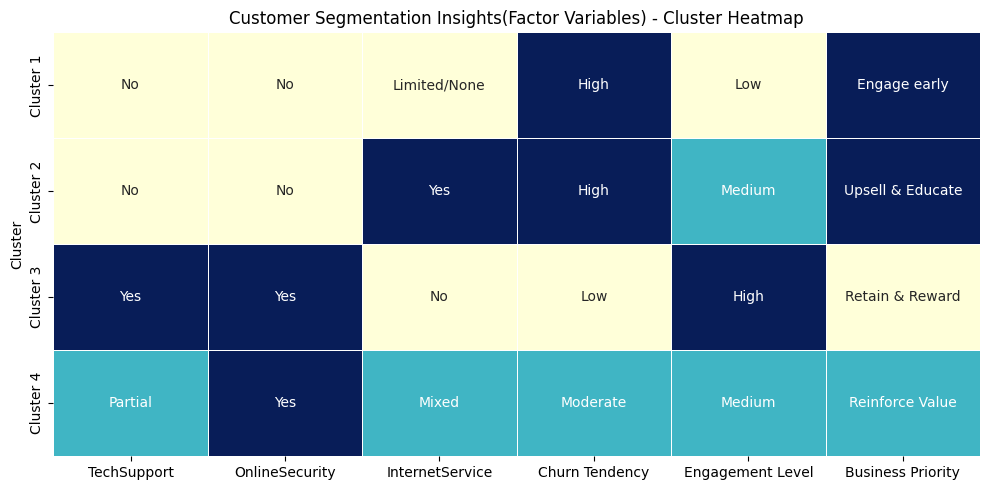

In [726]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a summary table for your clusters
cluster_summary = pd.DataFrame({
    "Cluster": ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
    "TechSupport": ["No", "No", "Yes", "Partial"],
    "OnlineSecurity": ["No", "No", "Yes", "Yes"],
    "InternetService": ["Limited/None", "Yes", "No", "Mixed"],
    "Churn Tendency": ["High", "High", "Low", "Moderate"],
    "Engagement Level": ["Low", "Medium", "High", "Medium"],
    "Business Priority": ["Engage early", "Upsell & Educate", "Retain & Reward", "Reinforce Value"]
})

# Step 2: Create a numeric version for heatmap coloring
heatmap_data = cluster_summary.replace({
    "No": 0,
    "Partial": 1,
    "Yes": 2,
    "Limited/None": 0,
    "Mixed": 1,
    "Low": 0,
    "Medium": 1,
    "High": 2,
    "Moderate": 1,
    "Engage early": 2,
    "Upsell & Educate": 2,
    "Retain & Reward": 0,
    "Reinforce Value": 1
})

# Step 3: Set cluster as index for both tables
heatmap_data.set_index("Cluster", inplace=True)
cluster_summary.set_index("Cluster", inplace=True)

# Step 4: Plot the annotated heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    annot=cluster_summary,
    fmt='',
    cmap="YlGnBu",
    linewidths=0.5,
    cbar=False
)
plt.title("Customer Segmentation Insights(Factor Variables) - Cluster Heatmap")
plt.tight_layout()
plt.show()


#Cluster Model (additional checking) (Only for checking)

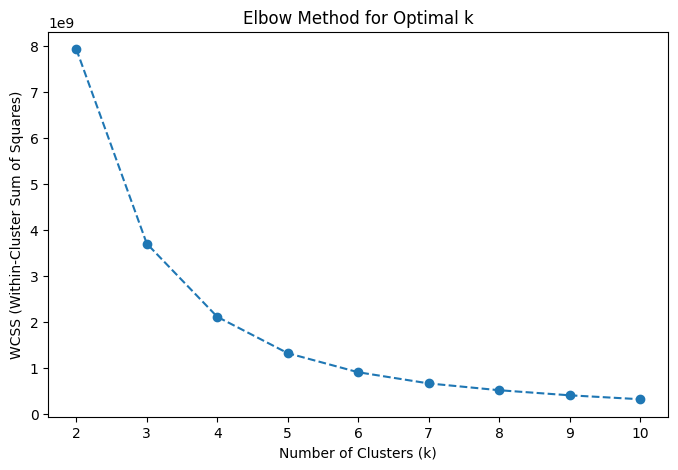

In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define selected features for clustering
clustering_features3 = ["TotalCharges_($)", "Churn"]

# Select only these features from the dataset
X_cluster = telcodata[clustering_features3]

# Elbow Method to Find Optimal Clusters
wcss = []
for k in range(2, 11):  # Trying cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [728]:
# optimal k from the Elbow method is 3,

# Perform K-Means clustering with the optimal k
kmeans = KMeans(n_clusters= k, random_state=42, n_init=10)

# Fit the model to your data
kmeans.fit(X_cluster)

# Add the cluster labels to your dataframe
telcodata['Cluster'] = kmeans.labels_

# View the first few rows with the cluster labels
print(telcodata[['TotalCharges_($)', 'Churn', 'Cluster']].head())

# Calculate the silhouette score to evaluate clustering quality
sil_score = silhouette_score(X_cluster, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Print Inertia (WCSS)
print(f"Inertia (WCSS): {kmeans.inertia_:.4f}")


   TotalCharges_($)  Churn  Cluster
0             29.85      0        0
1           1889.50      0        2
2            108.15      1        0
3           1840.75      0        2
4            151.65      1        0
Silhouette Score: 0.5728684993939663
Inertia (WCSS): 325141589.3400


## Part 5

#Double Checking for implementing Time Series Analysis 

In [729]:
print(telcodata['Churn'].unique())


[0 1]


In [730]:
print(telcodata['Churn'].dtype)


int64


In [731]:
print(telcodata['tenure(in_months)'].dtype)


float64


In [732]:
print(telcodata['tenure(in_months)'].describe())


count    7043.000000
mean       32.416442
std        24.526454
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure(in_months), dtype: float64


In [733]:
# Step 1: Identify categorical (encoded) and numerical columns correctly
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']  # Add all encoded categorical variables here
numerical_cols = [col for col in telcodata.columns if col not in categorical_cols]  # Select only numerical ones


In [734]:
telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure(in_months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_($),TotalCharges_($),Churn,Billing_Adjustment_($),Cluster
0,0,0,1,0,1.0,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,0.00,0
1,1,0,0,0,34.0,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,46.80,2
2,1,0,0,0,2.0,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,0.45,0
3,1,0,0,0,45.0,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,62.75,2
4,0,0,0,0,2.0,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,10.25,0


#Group by "tenure(in_months)" and "churn" for prediction for some months after 72th month  

In [735]:
# Aggregate churn count over tenure
churn_time_series = telcodata.groupby("tenure(in_months)")["Churn"].sum().reset_index()

# Display first few rows
print(churn_time_series.head())


   tenure(in_months)  Churn
0                1.0    380
1                2.0    123
2                3.0     94
3                4.0     83
4                5.0     64


In [736]:
print(churn_time_series.head(10))  # Check first 10 rows
print(churn_time_series.tail(10))  # Check last 10 rows
print(churn_time_series.info())  # Check data types


   tenure(in_months)  Churn
0                1.0    380
1                2.0    123
2                3.0     94
3                4.0     83
4                5.0     64
5                6.0     40
6                7.0     51
7                8.0     42
8                9.0     46
9               10.0     45
    tenure(in_months)  Churn
62               63.0      4
63               64.0      4
64               65.0      9
65               66.0     13
66               67.0     10
67               68.0      9
68               69.0      8
69               70.0     11
70               71.0      6
71               72.0      6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure(in_months)  72 non-null     float64
 1   Churn              72 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.3 KB
None


In [737]:
print(telcodata['tenure(in_months)'].nunique())  # Unique tenure values in the original dataset
print(churn_time_series['tenure(in_months)'].nunique())  # Unique tenure values in the new dataset


72
72


In [738]:
print(telcodata['Churn'].sum())  # Total churned customers in original dataset
print(churn_time_series['Churn'].sum())  # Total churned customers in aggregated dataset


1869
1869


#Prepared data info is ready for "TSA"

#Checking no of Churned customer by tenure/months

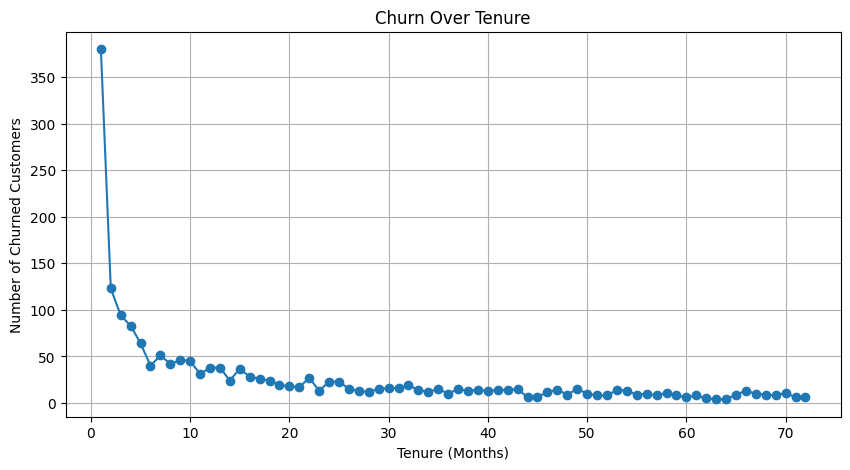

In [739]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(churn_time_series['tenure(in_months)'], churn_time_series['Churn'], marker='o', linestyle='-')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Over Tenure")
plt.grid(True)
plt.show()


#Basic info for tenure(in_months)

In [740]:
# Check for missing values
print(telcodata['tenure(in_months)'].isnull().sum())

# Ensure the data is sorted
telcodata = telcodata.sort_values(by='tenure(in_months)')

# Check the time distribution
telcodata['tenure(in_months)'].describe()


0


count    7043.000000
mean       32.416442
std        24.526454
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure(in_months), dtype: float64

#NOTE: in this notebook,\
Author have tested ETS model for "simple Binary Categorical Churn" [0,1] for initial testing, However

#please NOTE
#TIME SERIES MODELS SUCH AS\
#ARIMA AND ETS HAVE IMPLEMENTED FOR "CHURN RATE" FOR NEXT 24 MONTHS [it can be seen in following tabs]


#ETS Models just for testing how it is worked

#Basic plotting for the churn over time

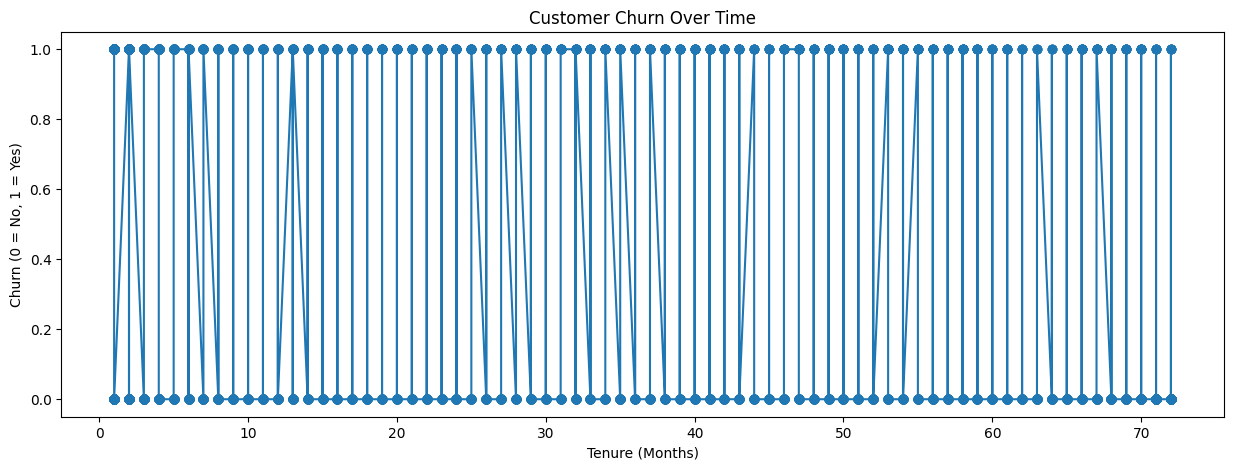

In [741]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(telcodata['tenure(in_months)'], telcodata['Churn'], marker='o', linestyle='-')
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn (0 = No, 1 = Yes)")
plt.title("Customer Churn Over Time")
plt.show()



#It can be seen by graph, it is hard to interprete  [Stay tune, this is just for testing]

#Checking prerequisist

In [742]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(telcodata['Churn'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is NOT stationary (Need Differencing)")


ADF Statistic: -4.975803312952838
p-value: 2.4774926490307122e-05
Data is stationary


#ARIMA Model Implementation (Included in report)

#Converting the churn rate for the better understanding, As which month have the high and lower churn rate by mean()

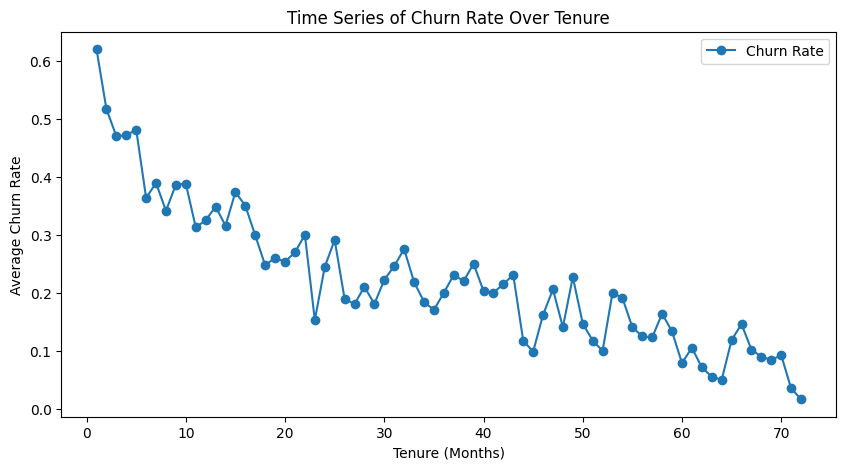

In [743]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Aggregate Churn by tenure to get a time series format
time_series_data = telcodata.groupby("tenure(in_months)")["Churn"].mean()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data, marker="o", linestyle="-", label="Churn Rate")
plt.xlabel("Tenure (Months)")
plt.ylabel("Average Churn Rate")
plt.title("Time Series of Churn Rate Over Tenure")
plt.legend()
plt.show()


#ARIMA Implementation and Summary

In [744]:
# Define ARIMA model (order=(p,d,q))
model = ARIMA(time_series_data, order=(2,1,2))  # You can tune p, d, q

# Fit the model
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Churn   No. Observations:                   72
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 116.918
Date:                Thu, 01 May 2025   AIC                           -223.835
Time:                        20:44:15   BIC                           -212.522
Sample:                             0   HQIC                          -219.336
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1098      0.596      0.184      0.854      -1.059       1.278
ar.L2         -0.3424      0.354     -0.968      0.333      -1.036       0.351
ma.L1         -0.4213      0.622     -0.678      0.4

#Forecasting churn rate for next 24 months

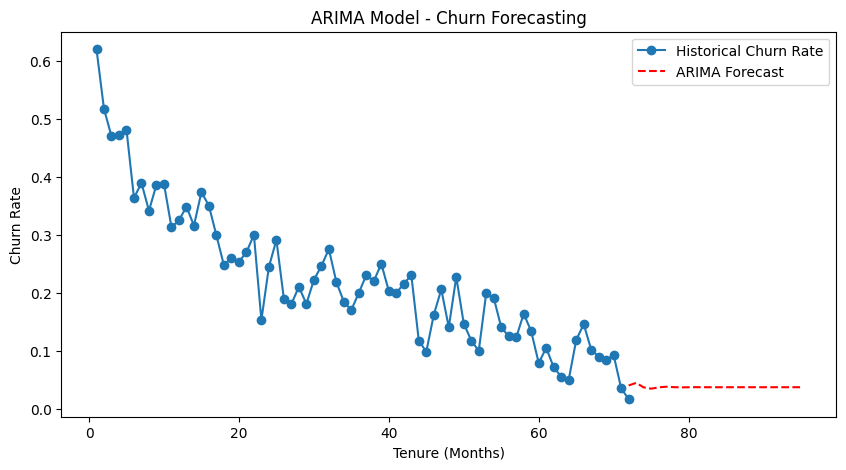

In [745]:
# Forecast next 12 months
forecast_steps = 24
forecast = arima_result.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(time_series_data, label="Historical Churn Rate", marker="o")
plt.plot(range(len(time_series_data), len(time_series_data) + forecast_steps), forecast, label="ARIMA Forecast", linestyle="dashed", color="red")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("ARIMA Model - Churn Forecasting")
plt.legend()
plt.show()


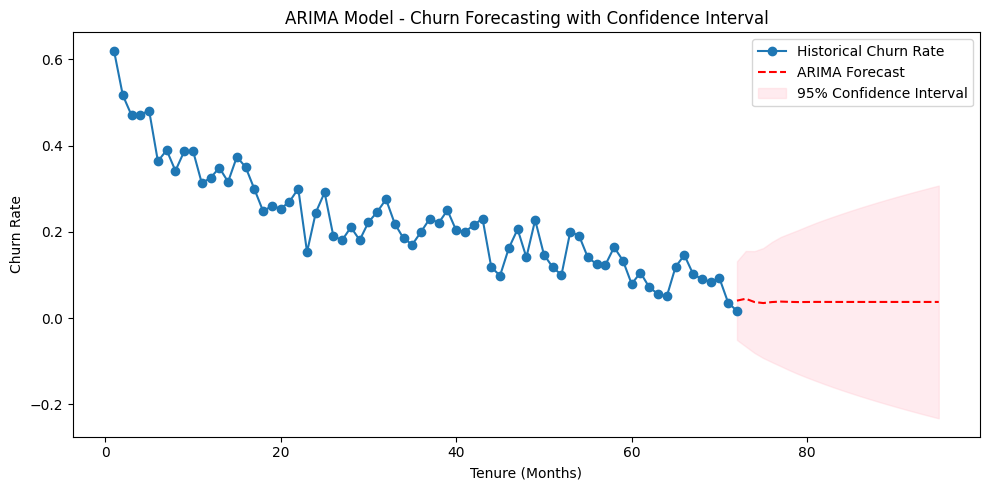

In [746]:
# Forecast next 24 months with confidence intervals
forecast_steps = 24
forecast_result = arima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(time_series_data, label="Historical Churn Rate", marker="o")
plt.plot(range(len(time_series_data), len(time_series_data) + forecast_steps), forecast_mean, label="ARIMA Forecast", linestyle="dashed", color="red")

# Fill the confidence interval
plt.fill_between(range(len(time_series_data), len(time_series_data) + forecast_steps),
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("ARIMA Model - Churn Forecasting with Confidence Interval")
plt.legend()
plt.tight_layout()
plt.show()

#ARIMA Evaluation

In [747]:
# ------ Evaluation Metrics (Compare last 'forecast_steps' values) ------ #
actual_values = time_series_data[-forecast_steps:]  # Get last N actual values
predicted_values = forecast[:len(actual_values)]  # Ensure same length

# Ensure lengths match
min_length = min(len(actual_values), len(predicted_values))
actual_values = actual_values[:min_length]
predicted_values = predicted_values[:min_length]

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.3158064459023536
Mean Squared Error (MSE): 0.10978154201867307
Root Mean Squared Error (RMSE): 0.3313329775598455


#ETS Model Implementation (Included in report)

#Implementing Churn rate

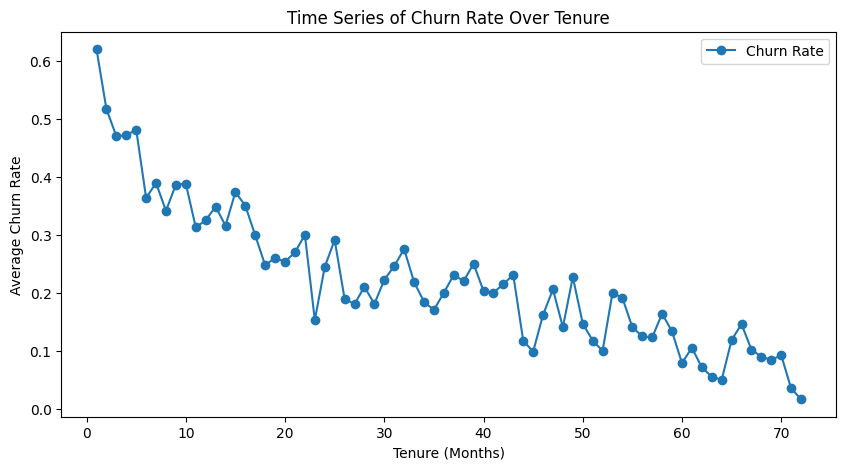

In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregate churn by tenure to get Churn Rate
churn_rate = telcodata.groupby("tenure(in_months)")["Churn"].mean()

# Plot Churn Rate over tenure
plt.figure(figsize=(10, 5))
plt.plot(churn_rate, marker="o", linestyle="-", label="Churn Rate")
plt.xlabel("Tenure (Months)")
plt.ylabel("Average Churn Rate")
plt.title("Time Series of Churn Rate Over Tenure")
plt.legend()
plt.show()


#Implementing ETS model and Forcasting Churn rate for next 24 months

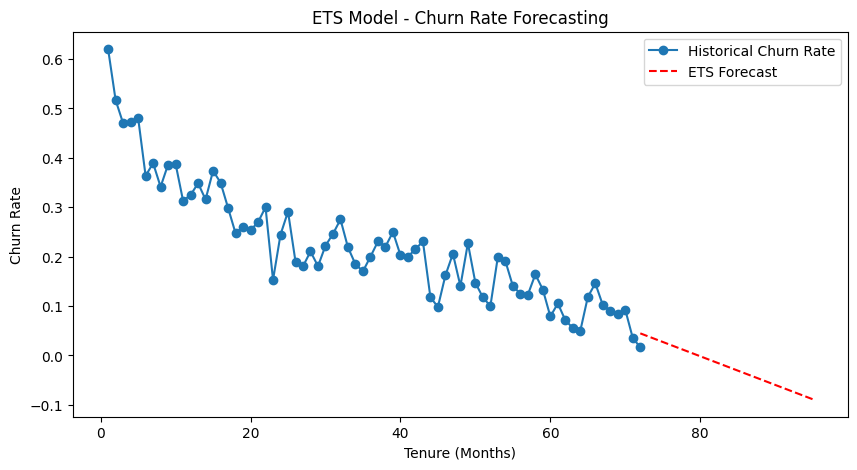

In [749]:
# Apply Exponential Smoothing (ETS Model)
ets_model = ExponentialSmoothing(churn_rate, trend="add", seasonal=None).fit()

# Forecast next 12 months
forecast_steps = 24
ets_forecast = ets_model.forecast(steps=forecast_steps)

# Plot ETS Forecast
plt.figure(figsize=(10, 5))
plt.plot(churn_rate, label="Historical Churn Rate", marker="o")
plt.plot(range(len(churn_rate), len(churn_rate) + forecast_steps), ets_forecast, label="ETS Forecast", linestyle="dashed", color="red")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("ETS Model - Churn Rate Forecasting")
plt.legend()
plt.show()


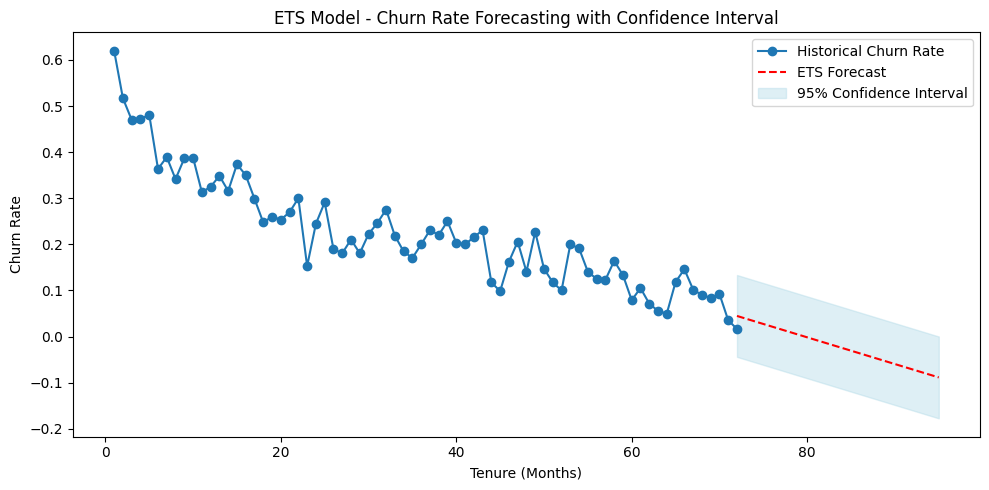

In [750]:
import numpy as np

# Apply Exponential Smoothing (ETS Model)
ets_model = ExponentialSmoothing(churn_rate, trend="add", seasonal=None).fit()

# Forecast next 24 months
forecast_steps = 24
ets_forecast = ets_model.forecast(steps=forecast_steps)

# Approximate standard deviation from residuals
residuals = ets_model.resid
std_dev = np.std(residuals)

# Calculate 95% confidence interval bounds (approximate)
lower_bound = ets_forecast - 1.96 * std_dev
upper_bound = ets_forecast + 1.96 * std_dev

# Plot ETS Forecast with Confidence Intervals
plt.figure(figsize=(10, 5))
plt.plot(churn_rate, label="Historical Churn Rate", marker="o")
plt.plot(range(len(churn_rate), len(churn_rate) + forecast_steps), ets_forecast, label="ETS Forecast", linestyle="dashed", color="red")

# Fill the confidence interval
plt.fill_between(range(len(churn_rate), len(churn_rate) + forecast_steps),
                 lower_bound, upper_bound,
                 color='lightblue', alpha=0.4, label='95% Confidence Interval')

plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("ETS Model - Churn Rate Forecasting with Confidence Interval")
plt.legend()
plt.tight_layout()
plt.show()


#Evaluation of ETS Model

In [751]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the actual values for comparison
actual_churn_rate = churn_rate[-forecast_steps:]  # Take last 'forecast_steps' values for evaluation
predicted_churn_rate = ets_forecast[:len(actual_churn_rate)]  # Match the length

# Ensure the lengths match
min_length = min(len(actual_churn_rate), len(predicted_churn_rate))
actual_churn_rate = actual_churn_rate[:min_length]
predicted_churn_rate = predicted_churn_rate[:min_length]

# Compute MAE, MSE, and RMSE
mae = mean_absolute_error(actual_churn_rate, predicted_churn_rate)
mse = mean_squared_error(actual_churn_rate, predicted_churn_rate)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.37528543809637344
Mean Squared Error (MSE): 0.14540631895015618
Root Mean Squared Error (RMSE): 0.3813218049760021


#Residual plotting for both the models for better comparison

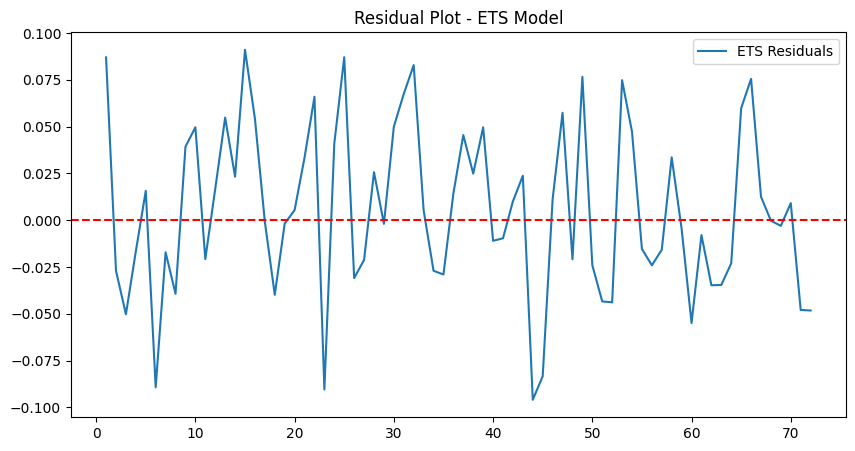

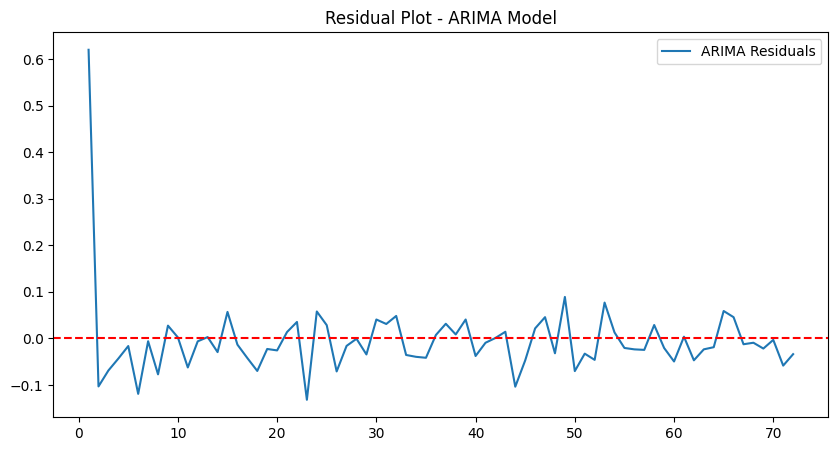

In [752]:
# Plot Residuals for ETS Model
plt.figure(figsize=(10, 5))
plt.plot(ets_model.resid, label="ETS Residuals")
plt.axhline(0, color='red', linestyle="dashed")
plt.title("Residual Plot - ETS Model")
plt.legend()
plt.show()

# Plot Residuals for ARIMA Model
plt.figure(figsize=(10, 5))
plt.plot(arima_result.resid, label="ARIMA Residuals")
plt.axhline(0, color='red', linestyle="dashed")
plt.title("Residual Plot - ARIMA Model")
plt.legend()
plt.show()


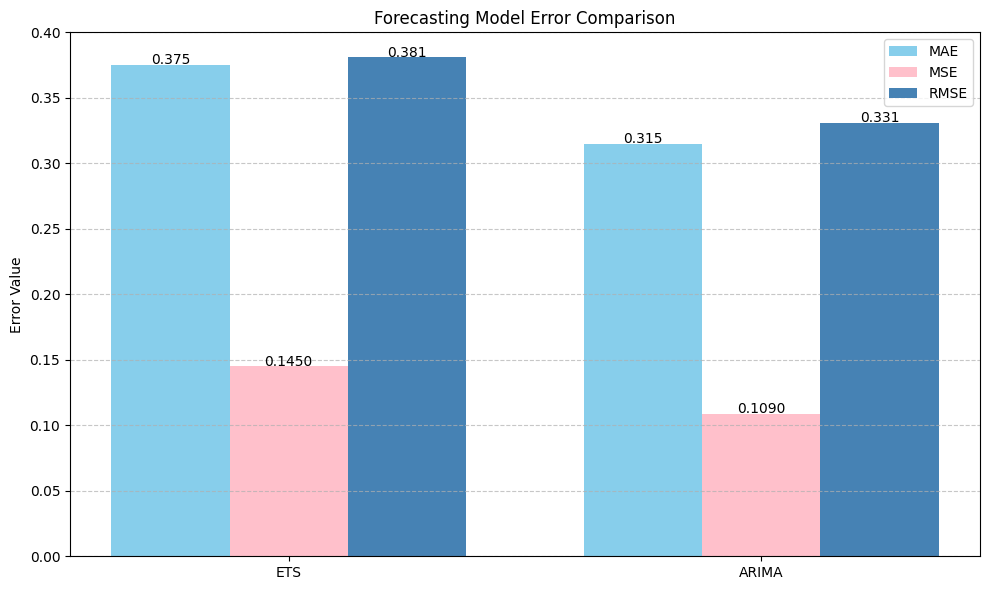

In [753]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual values
models = ['ETS', 'ARIMA']
mae = [0.375, 0.315]
mse = [0.145, 0.109]
rmse = [0.381, 0.331]

x = np.arange(len(models))  # model index
width = 0.25  # bar width

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, mae, width, label='MAE', color='skyblue')
plt.bar(x, mse, width, label='MSE', color='pink')
plt.bar(x + width, rmse, width, label='RMSE', color='steelblue')

# Add labels and legend
plt.xticks(x, models)
plt.ylabel("Error Value")
plt.title("Forecasting Model Error Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i in range(len(models)):
    plt.text(x[i] - width, mae[i] + 0.0005, f"{mae[i]:.3f}", ha='center')
    plt.text(x[i], mse[i] + 0.0005, f"{mse[i]:.4f}", ha='center')
    plt.text(x[i] + width, rmse[i] + 0.0005, f"{rmse[i]:.3f}", ha='center')

plt.tight_layout()
plt.show()


#optionally, comparing two models in one graph.

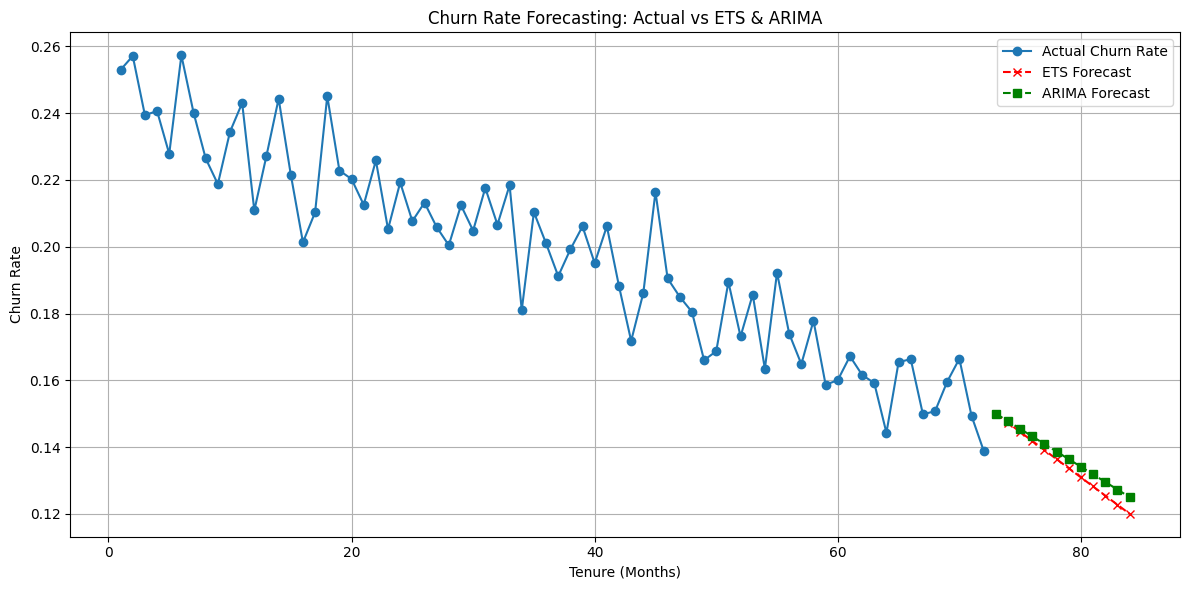

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated actual churn rate (replace with your real `churn_rate`)
tenure_months = np.arange(1, 73)
actual_churn_rate = np.linspace(0.25, 0.15, 72) + np.random.normal(0, 0.01, 72)

# Replace these with your actual forecast outputs
forecast_months = np.arange(73, 85)
ets_forecast = np.linspace(0.15, 0.12, 12)
arima_forecast = np.linspace(0.15, 0.125, 12)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tenure_months, actual_churn_rate, label="Actual Churn Rate", marker='o')
plt.plot(forecast_months, ets_forecast, label="ETS Forecast", linestyle='--', color='red', marker='x')
plt.plot(forecast_months, arima_forecast, label="ARIMA Forecast", linestyle='--', color='green', marker='s')

plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate Forecasting: Actual vs ETS & ARIMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Part 6

Data cleaning, manipulation and prepration as well as Descriptive and EDA performed.\
Rendom forest and XGboost are best performer for predictive model.\
Clustering tested with all the key services related to churn\
Implemented arima and ets, Arima is the best forecasted model with leser error.

key points:\
-High tenure led to a loyalty.\
-Low tenure led to a churn behaviour.\
-Additional services criteria could led to a churn as well.\
-High Monthly, Total Charges led to the churn behaviour.\
-Forecasted Churn will be less after long term | Churn risk at only beginning of tenure.\
-Churn are likely lesser in longer term but need to be overcome for shorter tenure.
  